In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import Series
from matplotlib import pyplot

import scipy.stats
import seaborn as sns
import datetime
from pylab import rcParams

plt.style.use('ggplot')
sns.set(font_scale=0.9)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np

from pandas import TimeGrouper

from matplotlib.pylab import rcParams


rcParams['figure.figsize'] = 25, 10

In [2]:
weather_df = pd.read_csv('datasets/Riyadh_weather.csv')

In [3]:
weather_df.head()

date  Temperature_Max  Temperature_Avg  Temperature_Min  Dew_Point_Max  \
0  2008-1-1               78               62               46             36   
1  2008-1-2               80               68               55             39   
2  2008-1-3               80               66               51             43   
3  2008-1-4               71               65               59             57   
4  2008-1-5               66               60               51             57   

   Dew_Point_Avg  Dew_Point_Min  Humidity_Max  Humidity_Min  Wind_speed_Max  \
0             30             27            53            17               8   
1             33             30            41            20              14   
2             37             30            58            18               9   
3             45             36            82            37              13   
4             51             46            94            55              14   

   Wind_speed_Min  Pressure_Max  Pressure_Min  
0               0         30.15         30.01  
1               4         30.06         29.95  
2               0         30.09         29.98  
3               0         30.09         29.98  
4               0         30.18         30.06

In [4]:
weather_df.shape

(4016, 13)

In [5]:
weather_df.isna().sum()

date               0
Temperature_Max    0
Temperature_Avg    0
Temperature_Min    0
Dew_Point_Max      0
Dew_Point_Avg      0
Dew_Point_Min      0
Humidity_Max       0
Humidity_Min       0
Wind_speed_Max     0
Wind_speed_Min     0
Pressure_Max       0
Pressure_Min       0
dtype: int64

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 13 columns):
date               4016 non-null object
Temperature_Max    4016 non-null int64
Temperature_Avg    4016 non-null int64
Temperature_Min    4016 non-null int64
Dew_Point_Max      4016 non-null int64
Dew_Point_Avg      4016 non-null int64
Dew_Point_Min      4016 non-null int64
Humidity_Max       4016 non-null int64
Humidity_Min       4016 non-null int64
Wind_speed_Max     4016 non-null int64
Wind_speed_Min     4016 non-null int64
Pressure_Max       4016 non-null float64
Pressure_Min       4016 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 408.0+ KB


In [7]:
weather_df[['Temperature_Max', 'Temperature_Avg', 'Temperature_Min', 'Dew_Point_Max', 'Dew_Point_Avg', 'Dew_Point_Min']] = weather_df[['Temperature_Max',
                                                                                                                                       'Temperature_Avg',
                                                                                                                                       'Temperature_Min',
                                                                                                                                       'Dew_Point_Max',
                                                                                                                                       'Dew_Point_Avg',
                                                                                                                                       'Dew_Point_Min']].astype(float)
def convert_FtoC(x):
    x = (x-32) * (5/9)
    return round(x, 1)
weather_df[['Temperature_Max', 'Temperature_Avg', 'Temperature_Min', 'Dew_Point_Max', 'Dew_Point_Avg', 'Dew_Point_Min']] = weather_df[['Temperature_Max',
                                                                                                                                       'Temperature_Avg',
                                                                                                                                       'Temperature_Min',
                                                                                                                                       'Dew_Point_Max',
                                                                                                                                       'Dew_Point_Avg',
                                                                                                                                       'Dew_Point_Min']].apply(convert_FtoC);

In [8]:
# converting to datetime & new columns for d,m,y
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
weather_df['month'] = weather_df['date'].dt.month
weather_df['day'] = weather_df['date'].dt.day

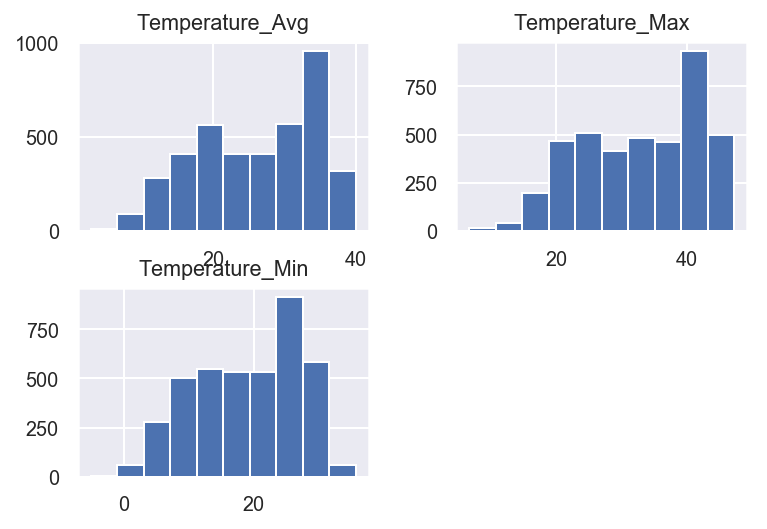

In [9]:
temps = weather_df[['Temperature_Max', 'Temperature_Avg', 'Temperature_Min']].keys()
weather_df[temps].hist();

In [10]:
weather_df.date = pd.to_datetime(weather_df.date)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 16 columns):
date               4016 non-null datetime64[ns]
Temperature_Max    4016 non-null float64
Temperature_Avg    4016 non-null float64
Temperature_Min    4016 non-null float64
Dew_Point_Max      4016 non-null float64
Dew_Point_Avg      4016 non-null float64
Dew_Point_Min      4016 non-null float64
Humidity_Max       4016 non-null int64
Humidity_Min       4016 non-null int64
Wind_speed_Max     4016 non-null int64
Wind_speed_Min     4016 non-null int64
Pressure_Max       4016 non-null float64
Pressure_Min       4016 non-null float64
year               4016 non-null int64
month              4016 non-null int64
day                4016 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(7)
memory usage: 502.1 KB


In [11]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(17,11)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
       ax[i].hist(dataframe[column], density=True, color='green', bins= 15) # feel free to add more settings
       ax[i].set_xlabel(list_of_columns[i])
       ax[i].set_ylabel('Probability')
       ax[i].set_title('PDF') # Set titles, labels, etc here for each subplot

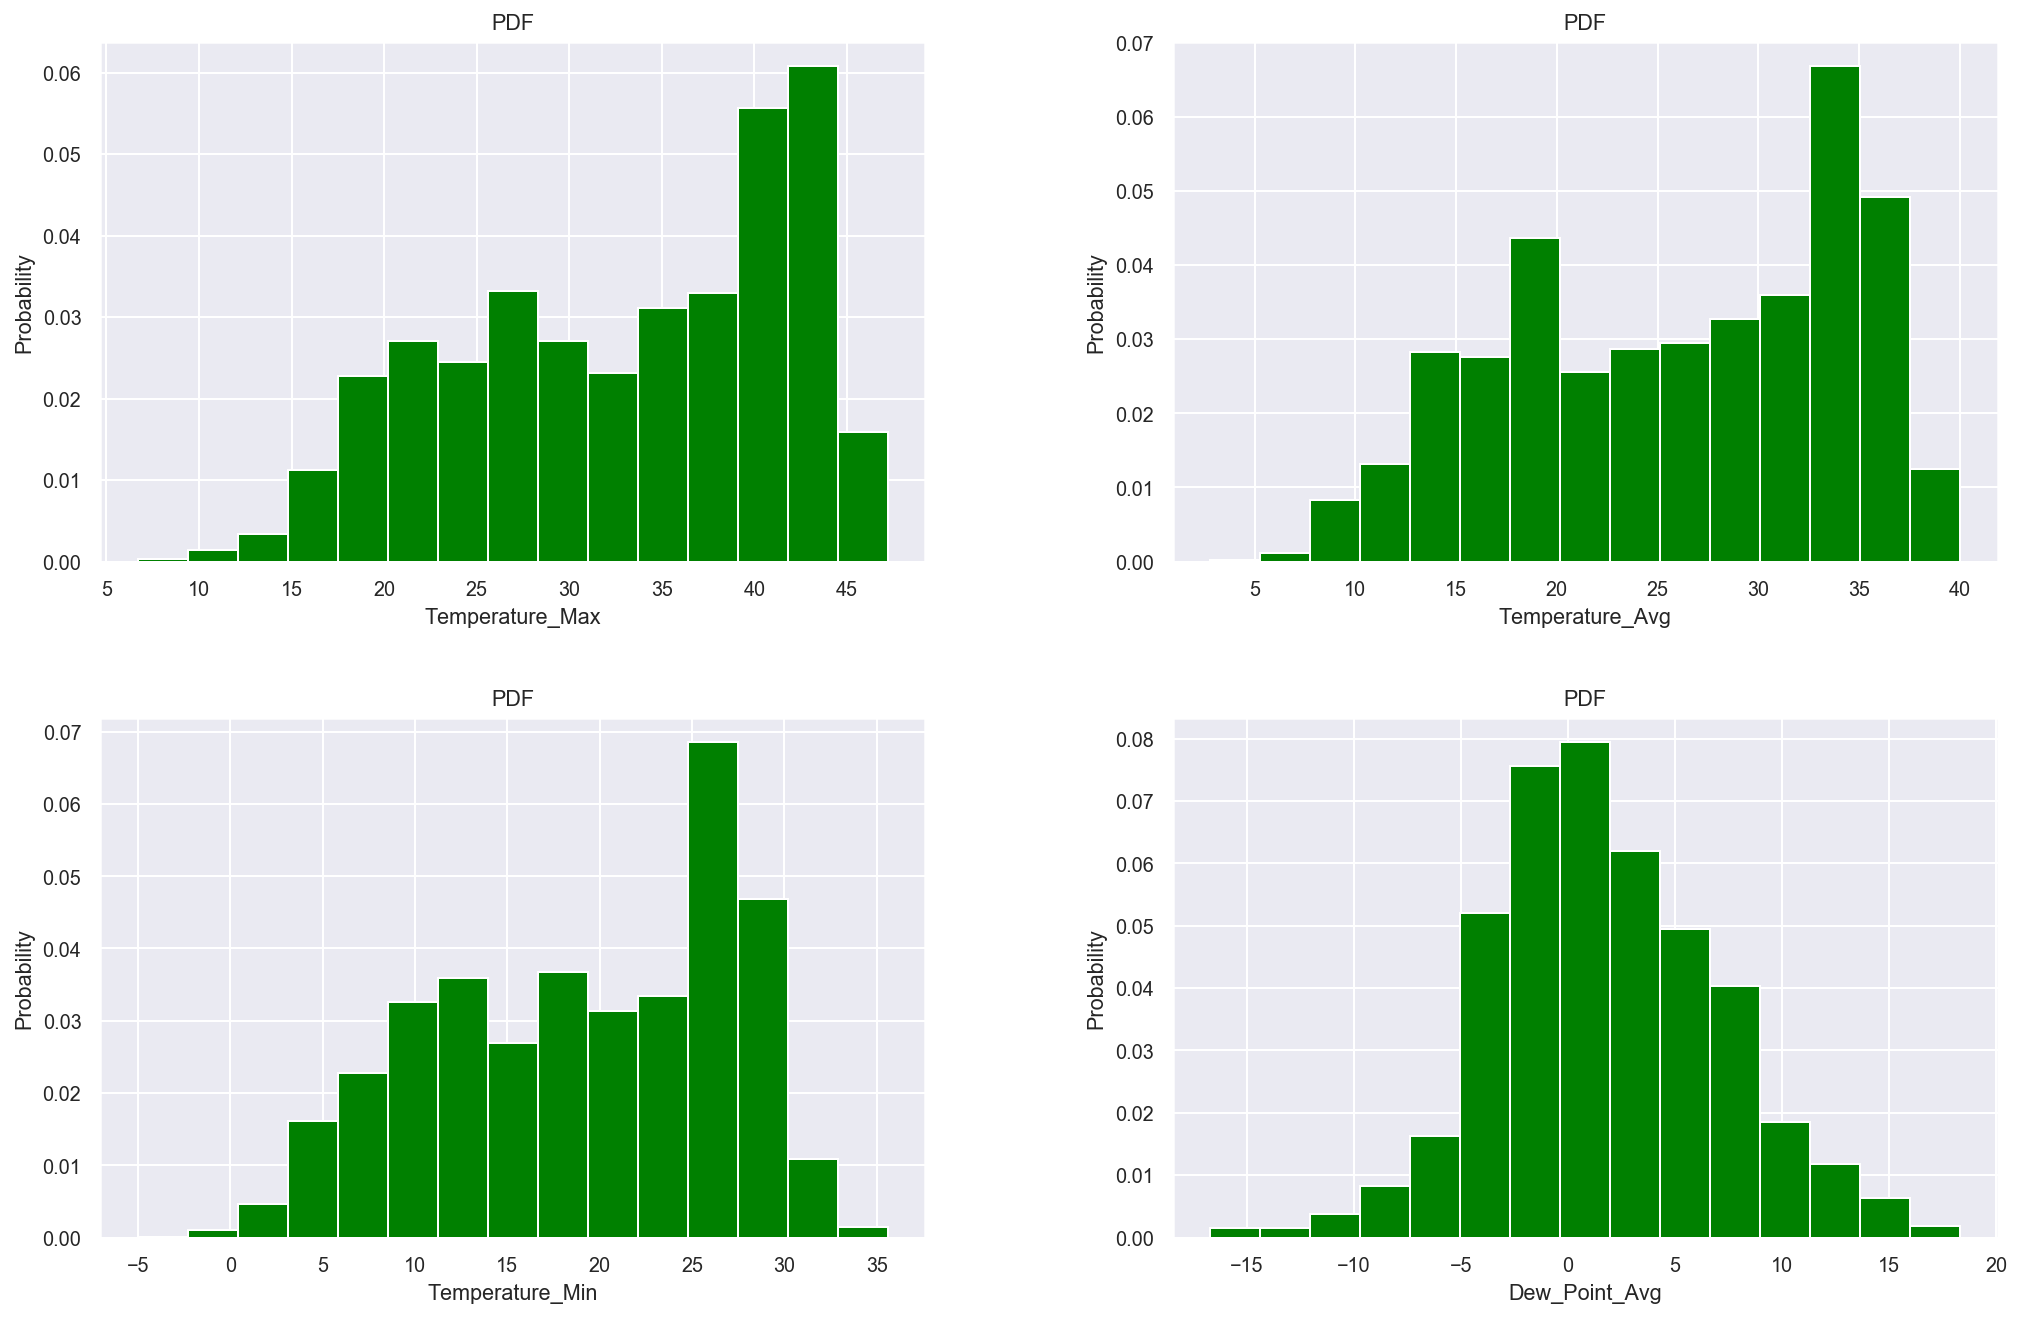

In [12]:
plot_columns = ['Temperature_Max', 'Temperature_Avg', 'Temperature_Min', 'Dew_Point_Avg']
subplot_histograms(weather_df, plot_columns, [column for column in plot_columns], plot_columns)

# Box plot

In [13]:
# fix datapoint value
weather_df.loc[512,'Dew_Point_Min'] = -8.3

In [14]:
weather_df.Dew_Point_Min.loc[512,]

-8.3

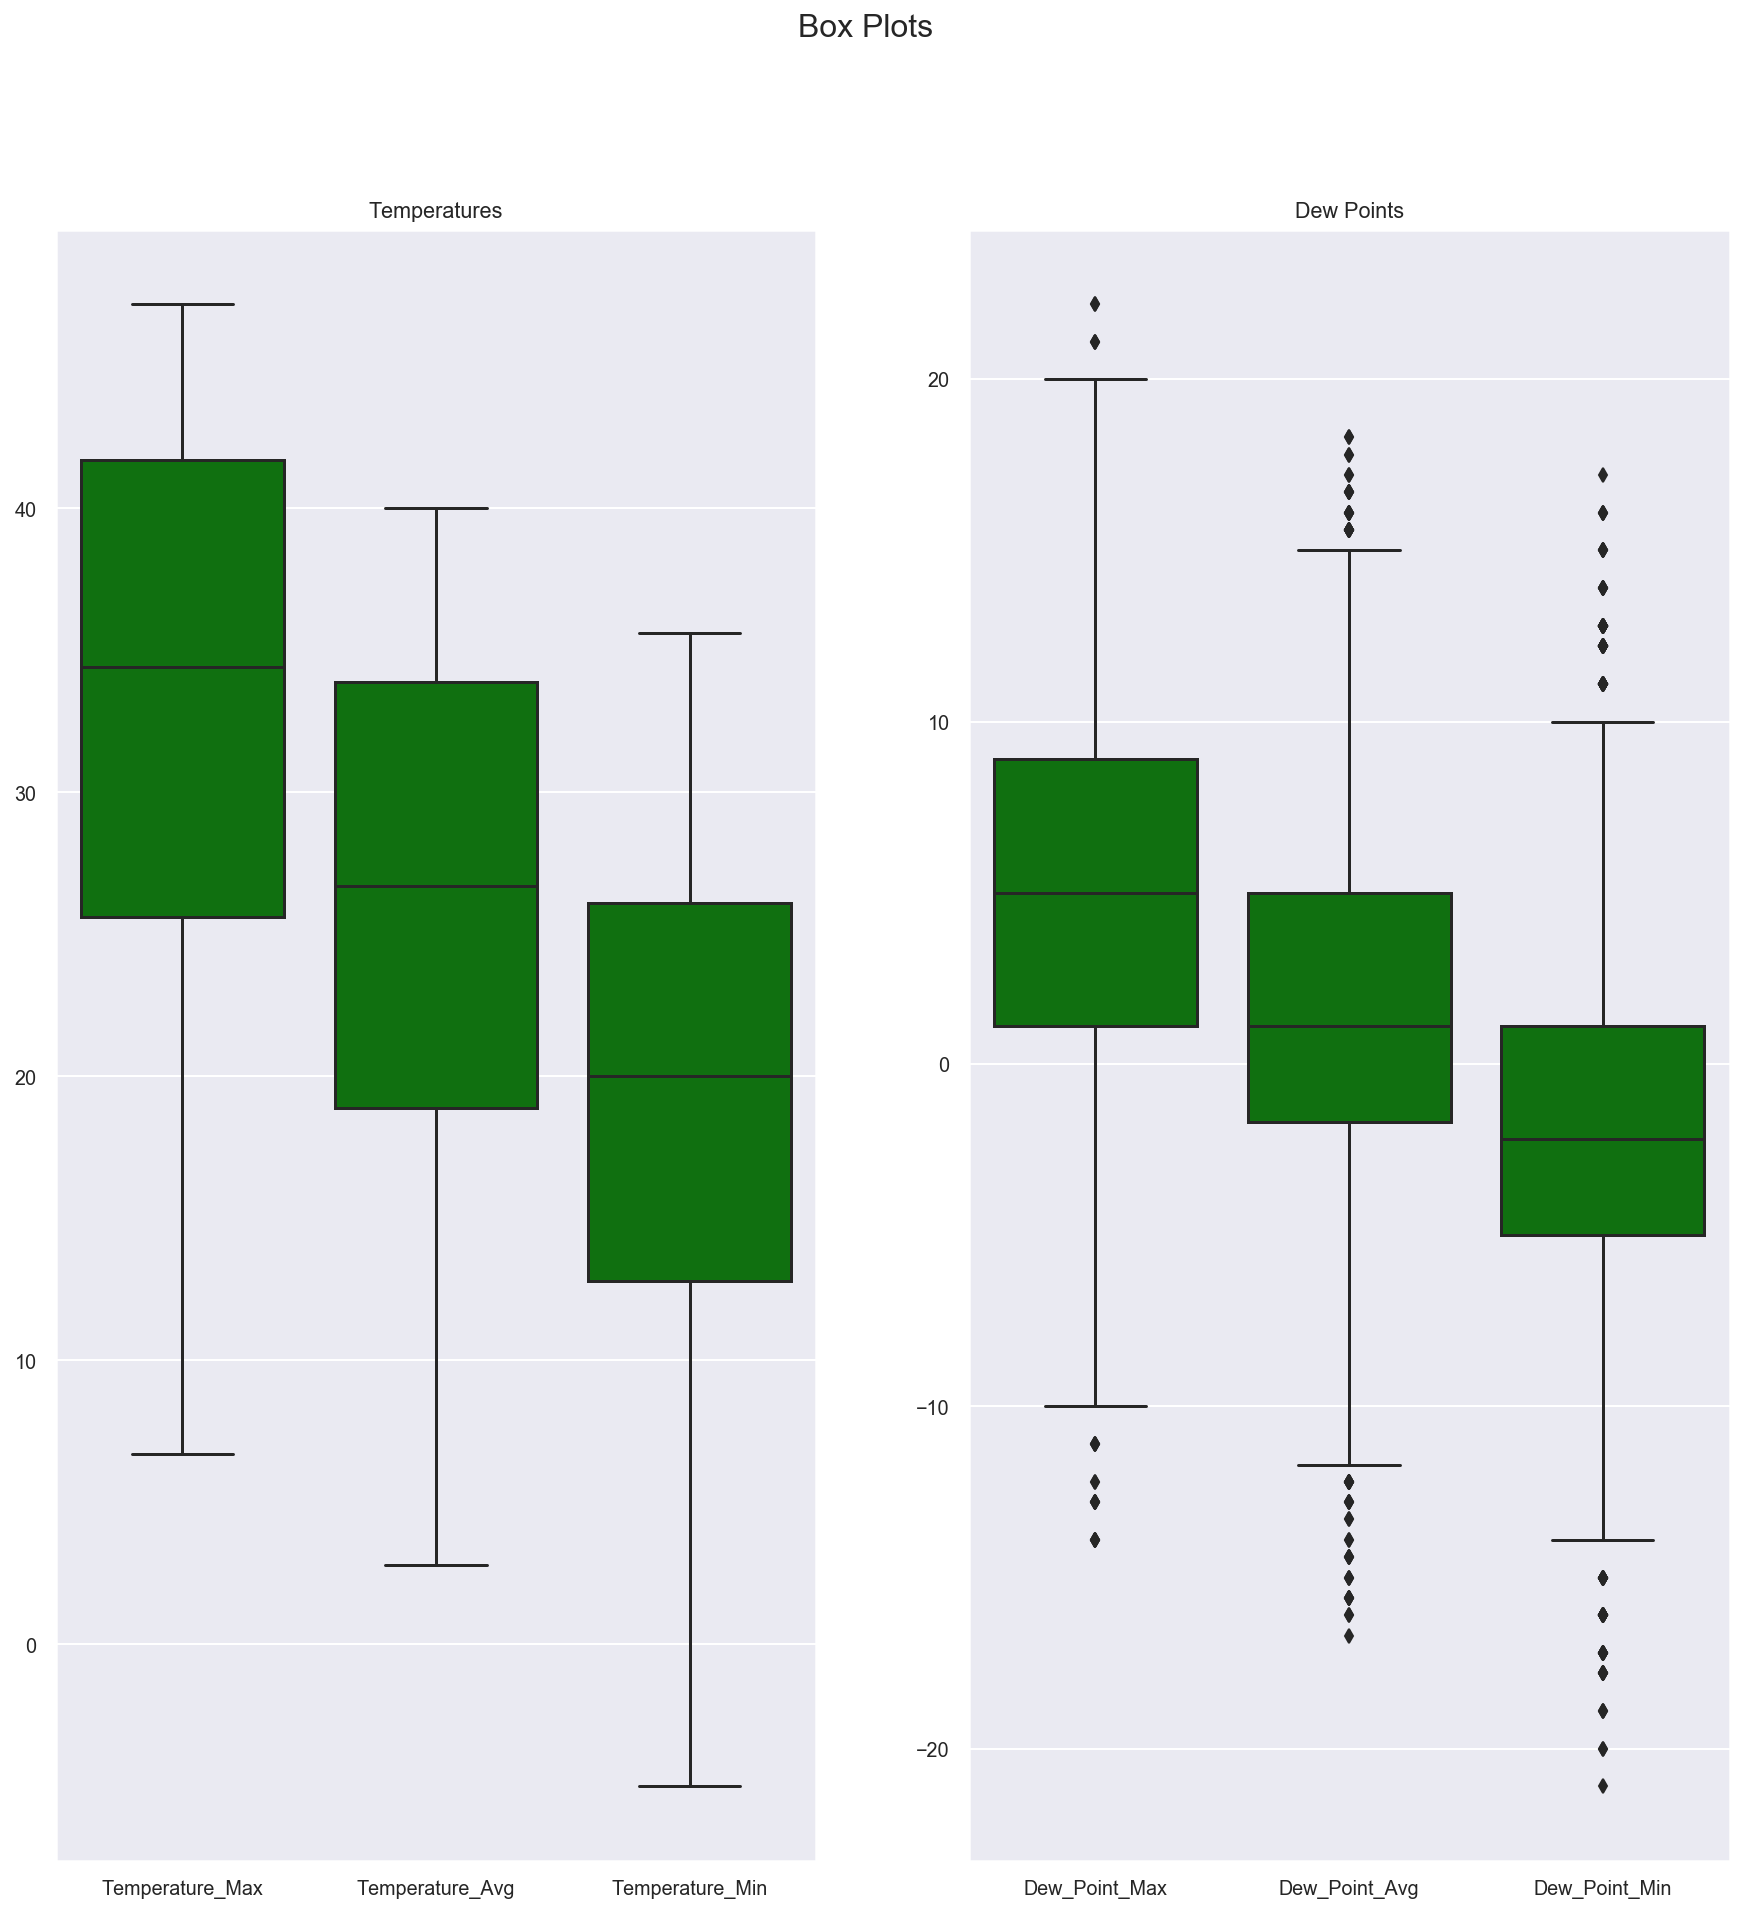

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
fig.suptitle("Box Plots", fontsize=16)
#ax[0].set_ylabel('Accidents')
sns.boxplot(data= weather_df[['Temperature_Max', 'Temperature_Avg', 'Temperature_Min']], ax=ax[0], color='green' ).set_title("Temperatures")
sns.boxplot(data= weather_df[['Dew_Point_Max', 'Dew_Point_Avg', 'Dew_Point_Min']], ax=ax[1], color='green' ).set_title("Dew Points");

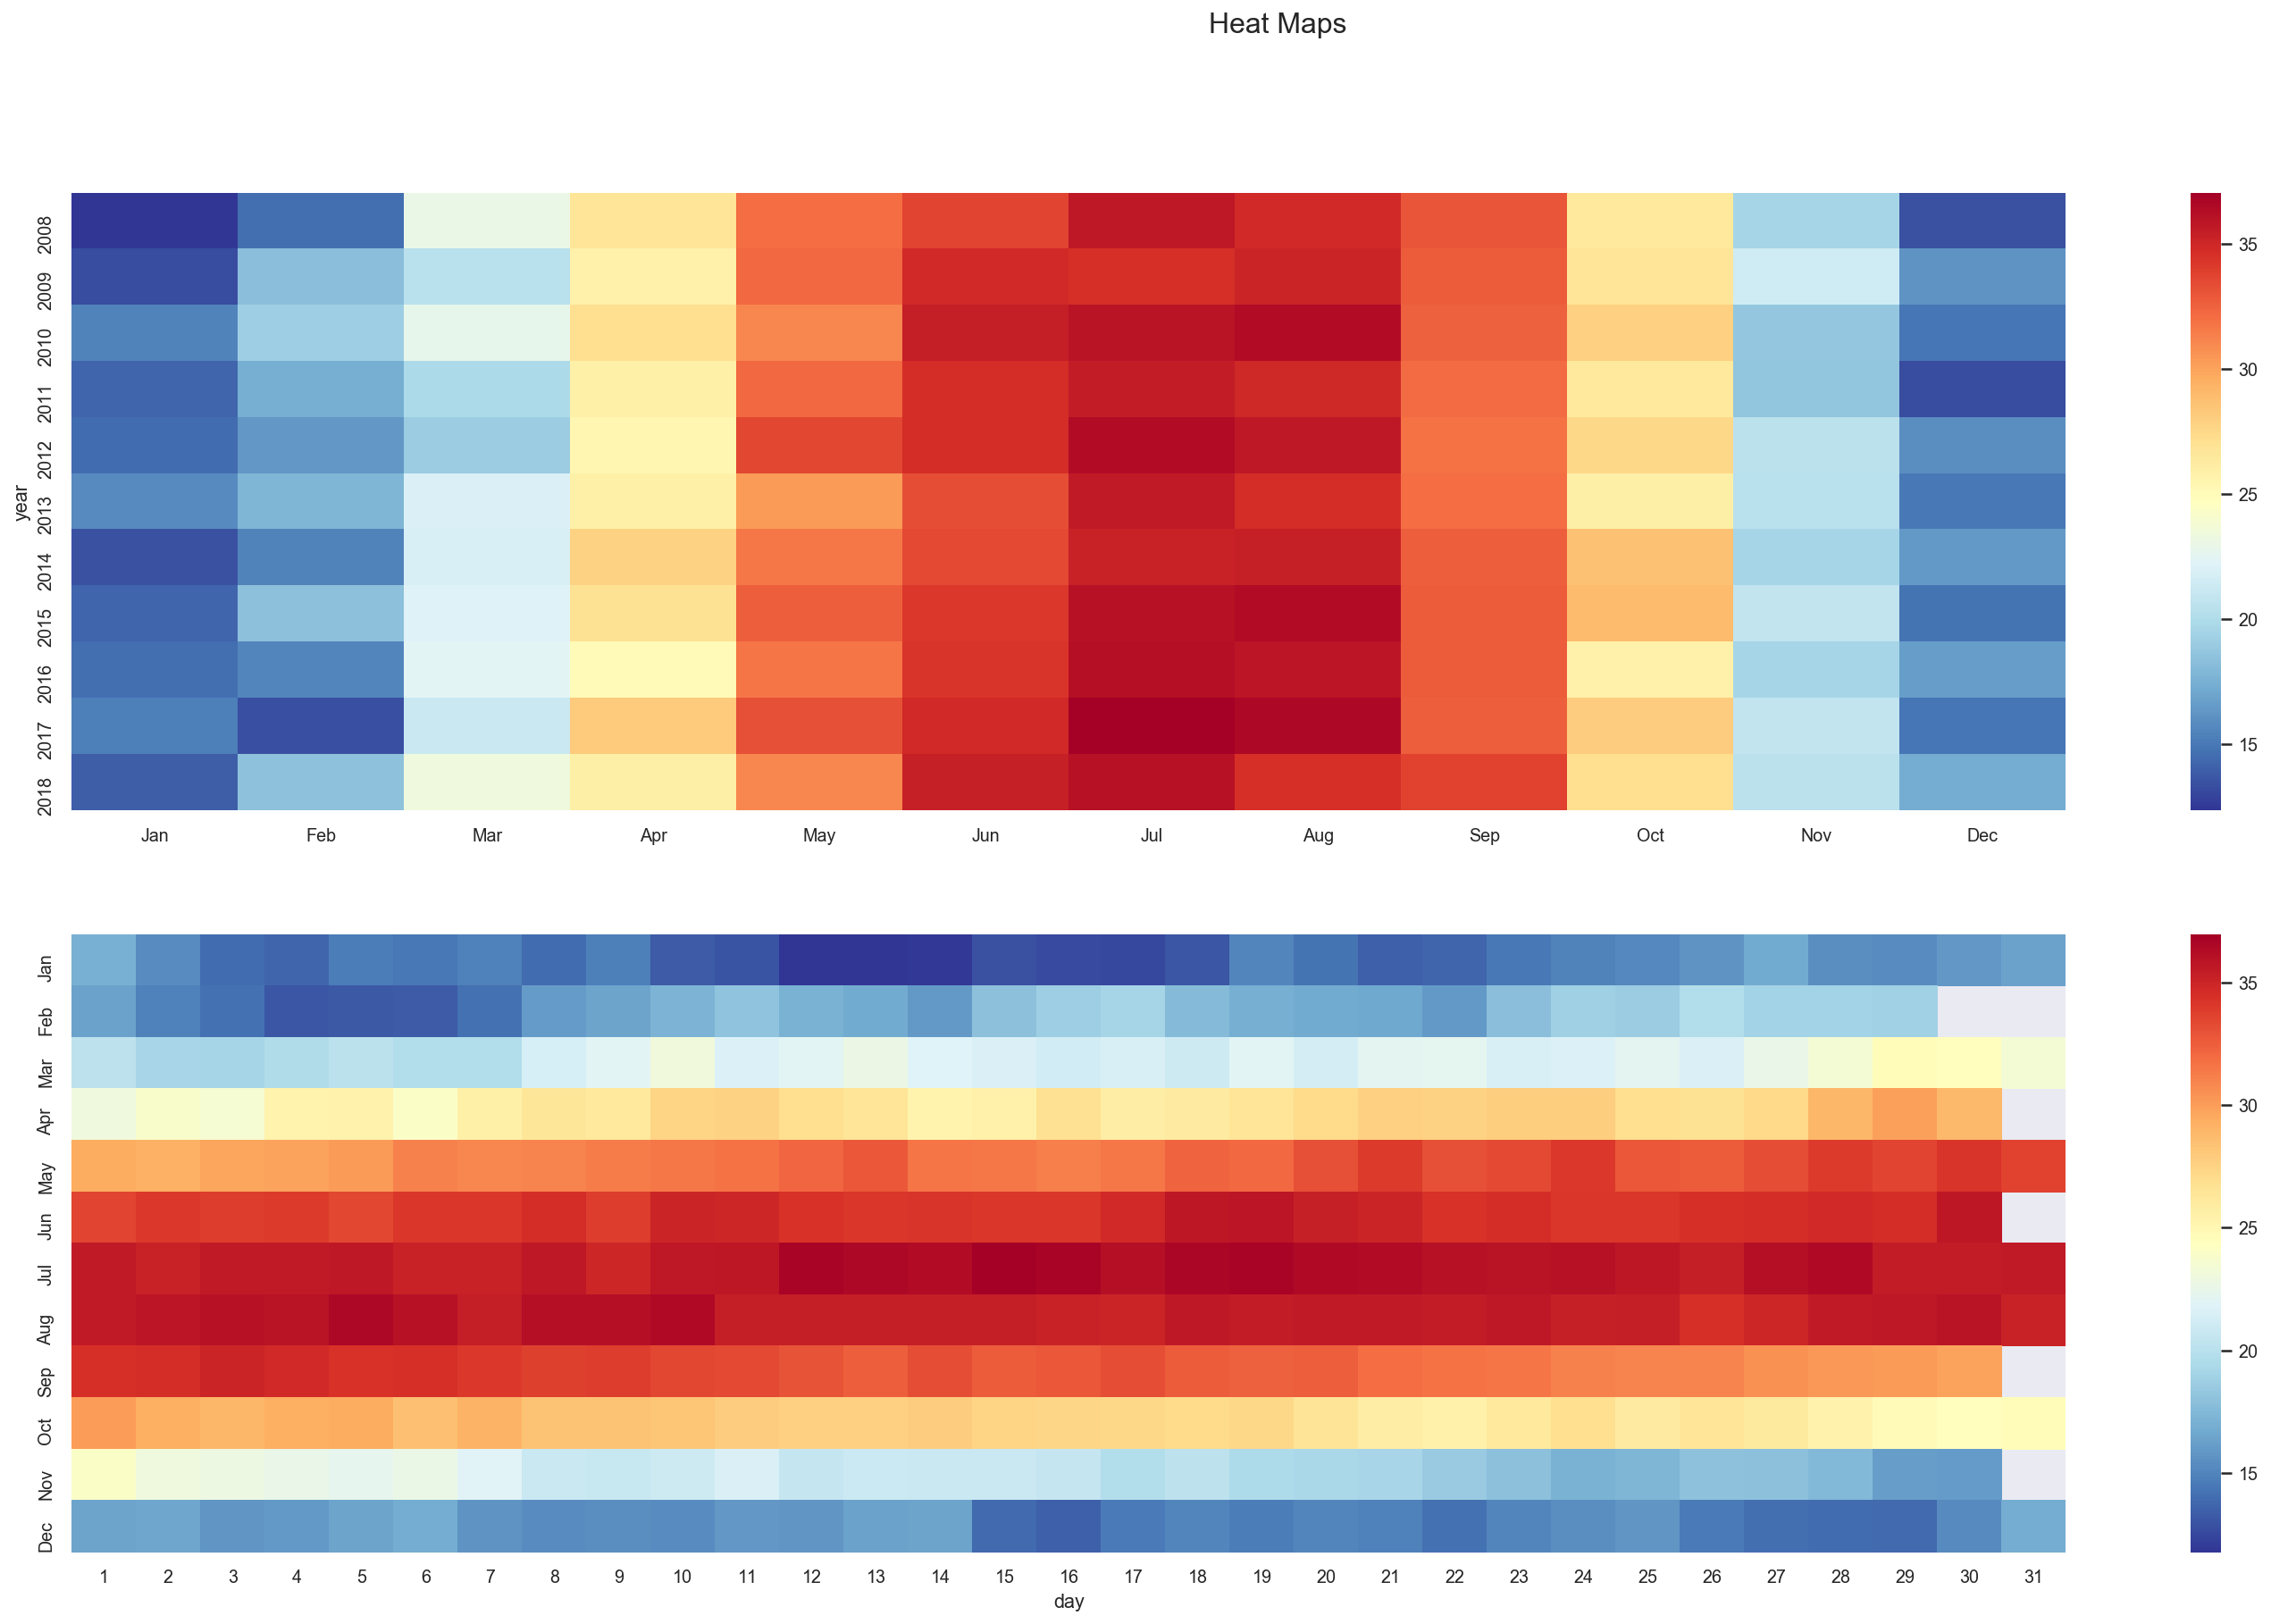

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,14))
fig.suptitle("Heat Maps", fontsize=16)

months= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2 = weather_df[['Temperature_Avg','Temperature_Min','year', 'month', 'day']]

heatmap2_data = pd.pivot_table(df2,values='Temperature_Avg', index=['month'], columns='year').T
heatmap2_data.columns = months
heatmap4_data = pd.pivot_table(df2,values='Temperature_Avg', index=['month'], columns='day')
heatmap4_data.index = months

sns.heatmap(heatmap2_data, cmap="RdYlBu_r", ax=ax[0])
sns.heatmap(heatmap4_data, cmap="RdYlBu_r", ax=ax[1]);

In [17]:
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,14))
fig.suptitle("Heat Maps", fontsize=16)

months= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2 = weather_df[['Temperature_Avg','Temperature_Min','year', 'month', 'day']]

heatmap2_data = pd.pivot_table(df2,values='Temperature_Avg', index=['month'], columns='year').T
heatmap2_data.columns = months
heatmap4_data = pd.pivot_table(df2,values='Temperature_Avg', index=['month'], columns='day')
heatmap4_data.index = months

sns.heatmap(heatmap2_data, cmap="RdYlBu_r", ax=ax[0])
sns.heatmap(heatmap4_data, cmap="RdYlBu_r", ax=ax[1]);

In [18]:
weather_df.set_index('date', inplace=True)

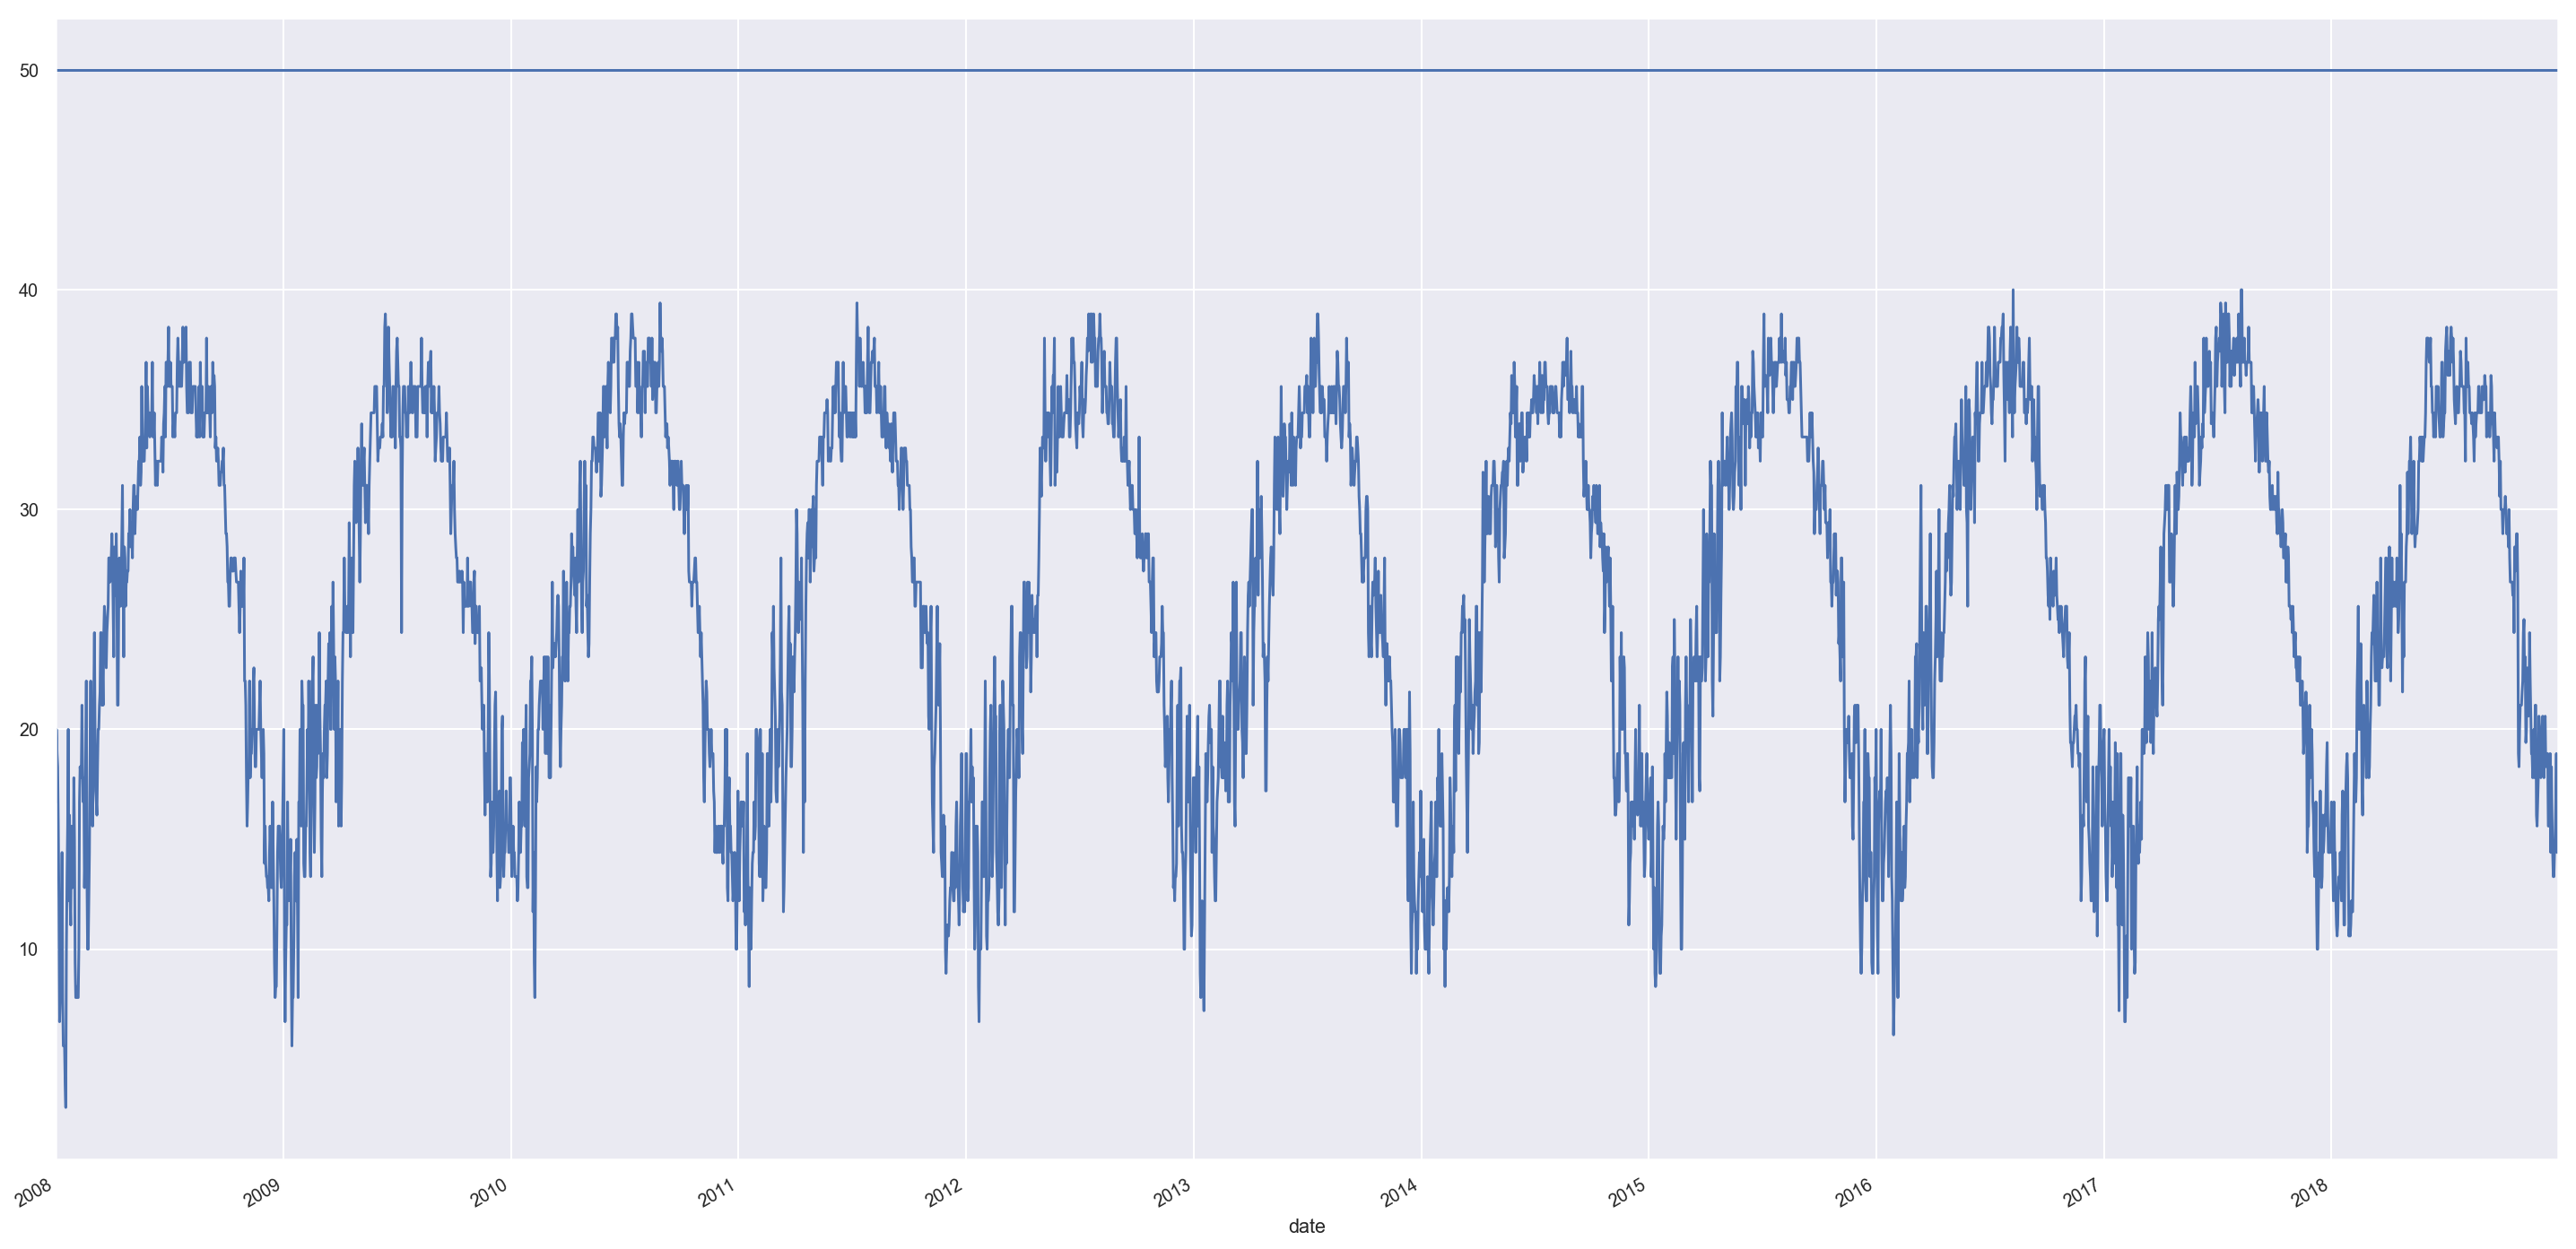

In [19]:
plt.figure(figsize=(25,13))
weather_df.Temperature_Avg.plot()
plt.gca().axhline(y=50)
plt.show()

In [20]:
resampled = weather_df.resample('W').mean()

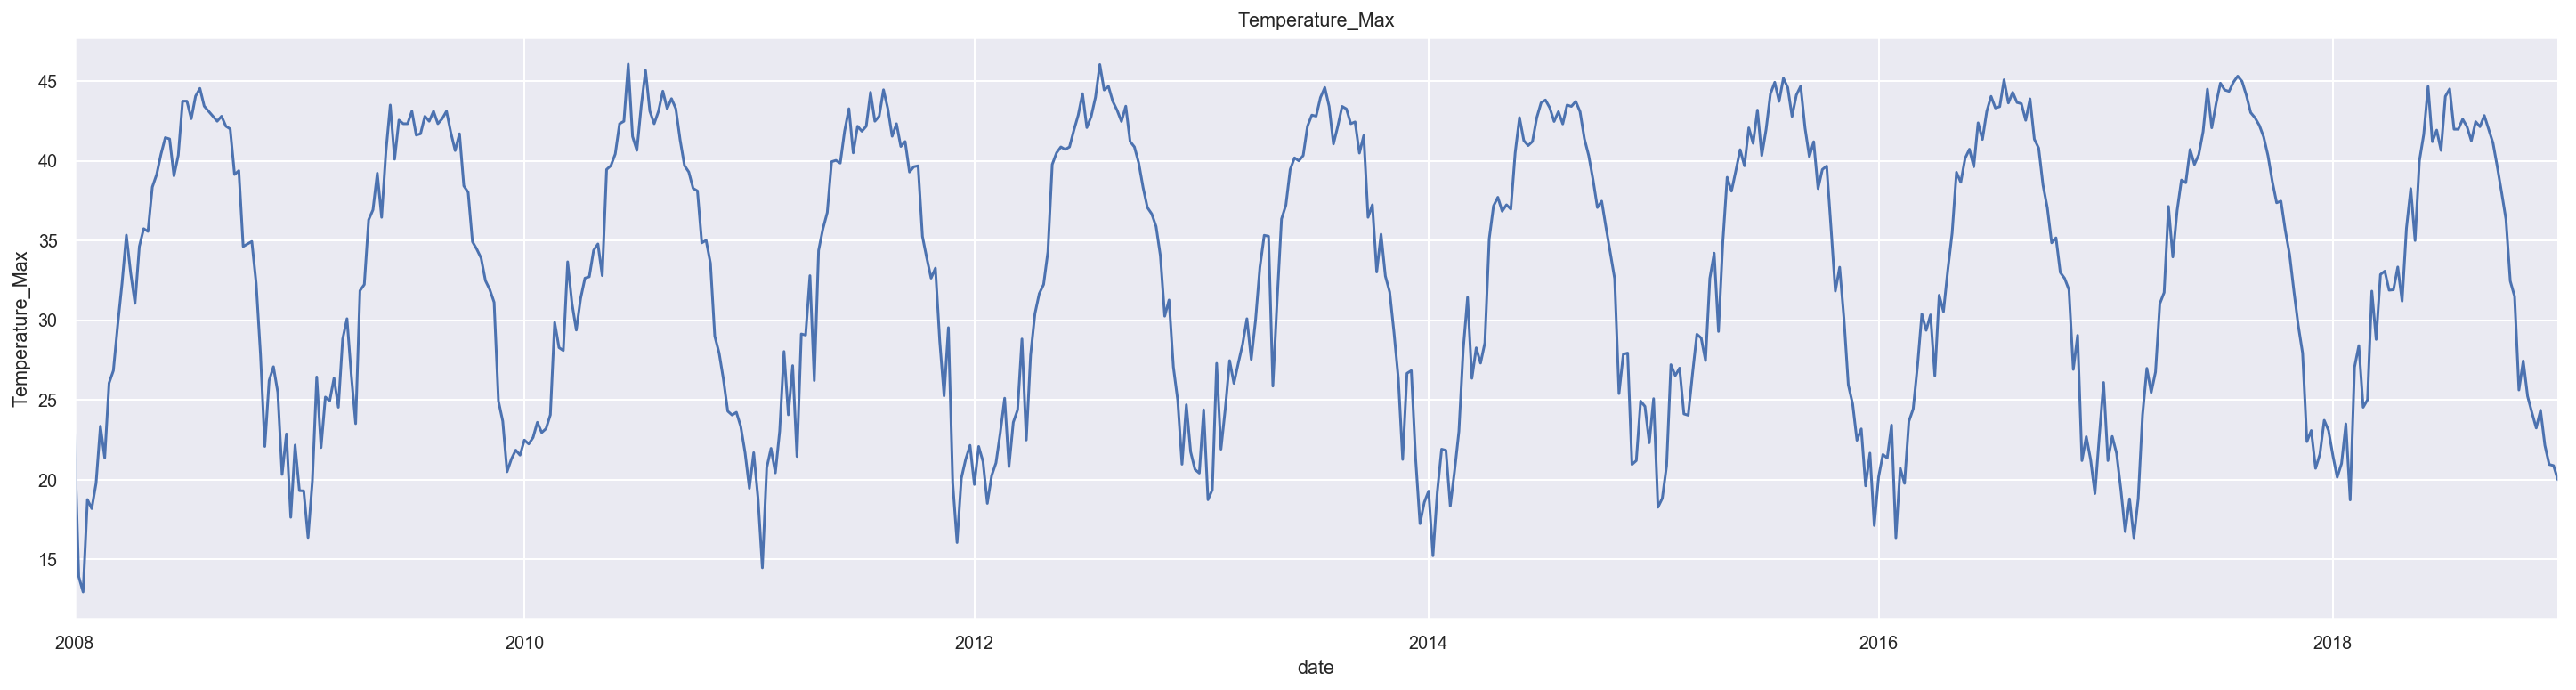

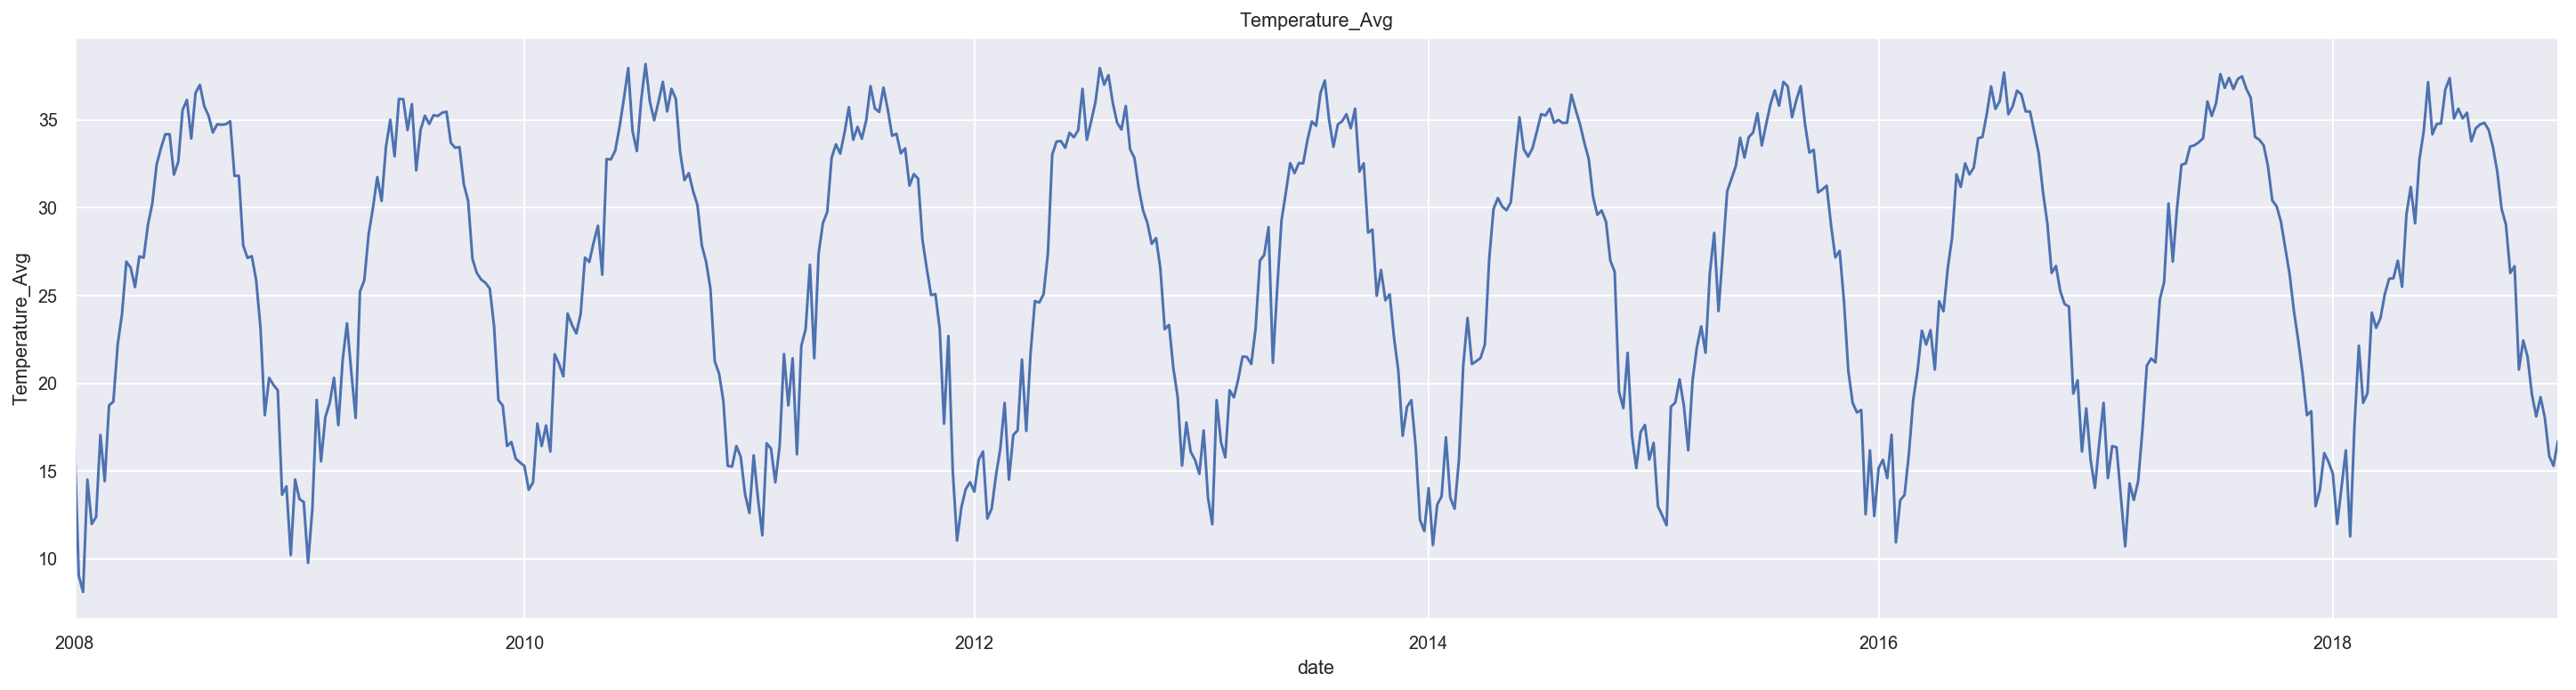

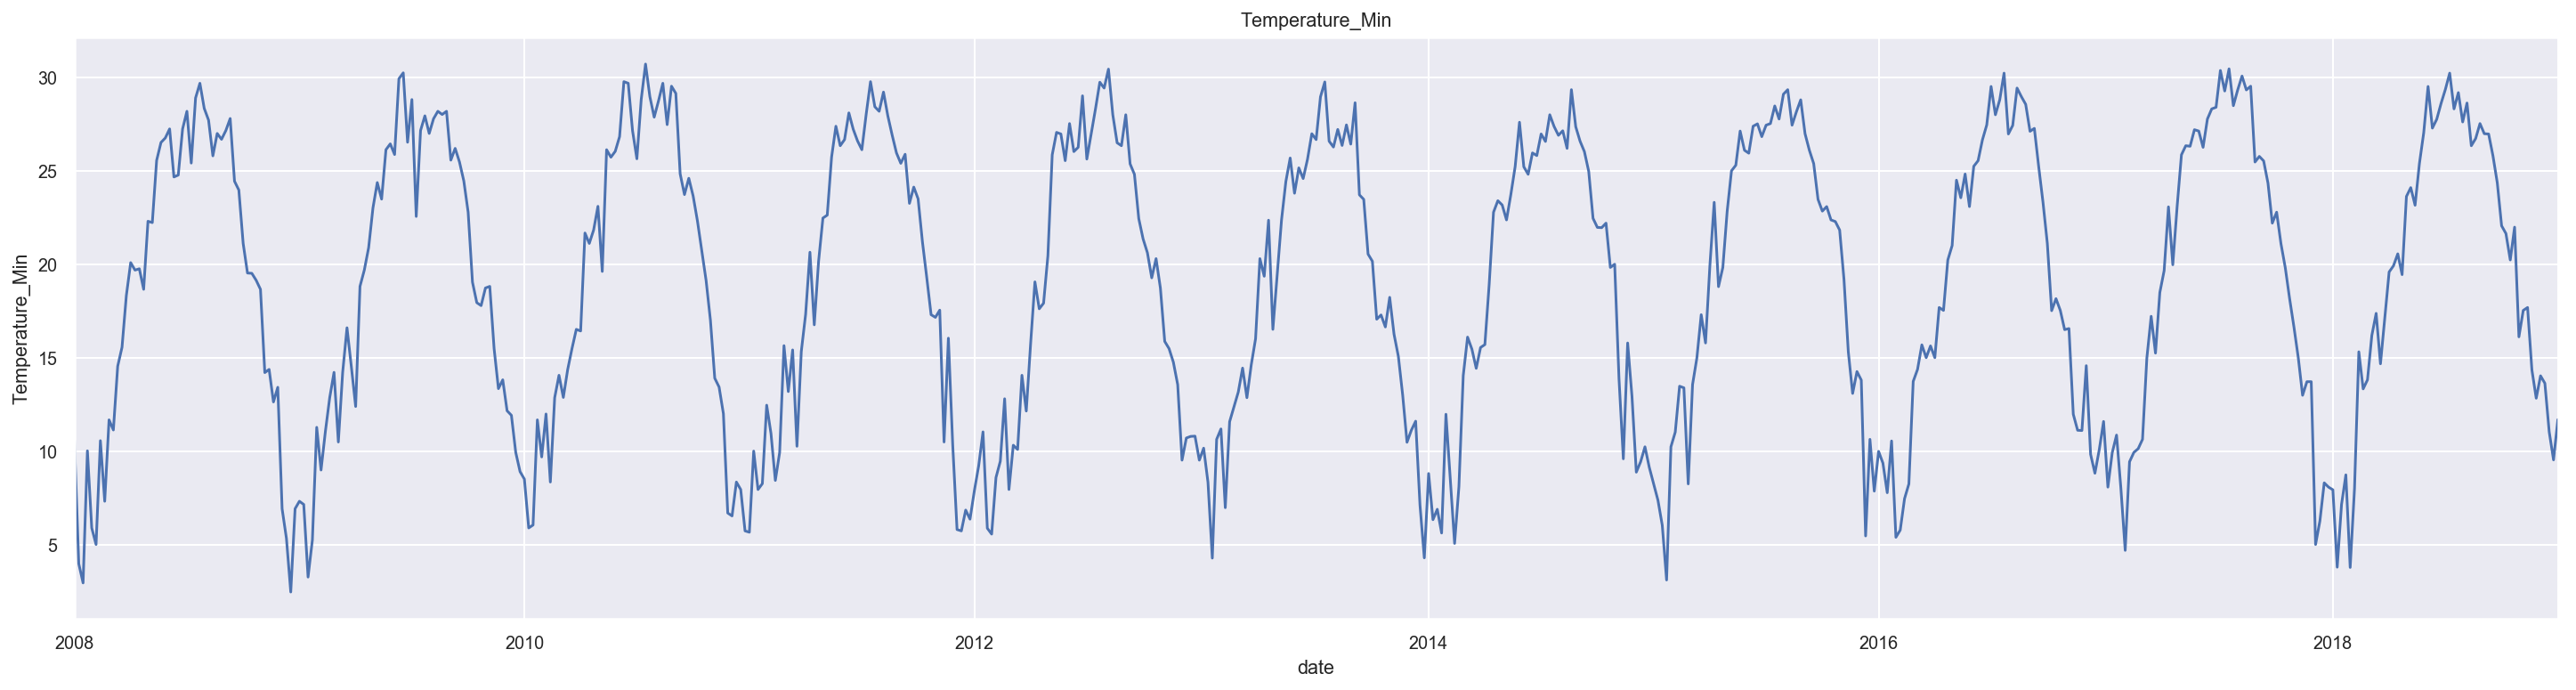

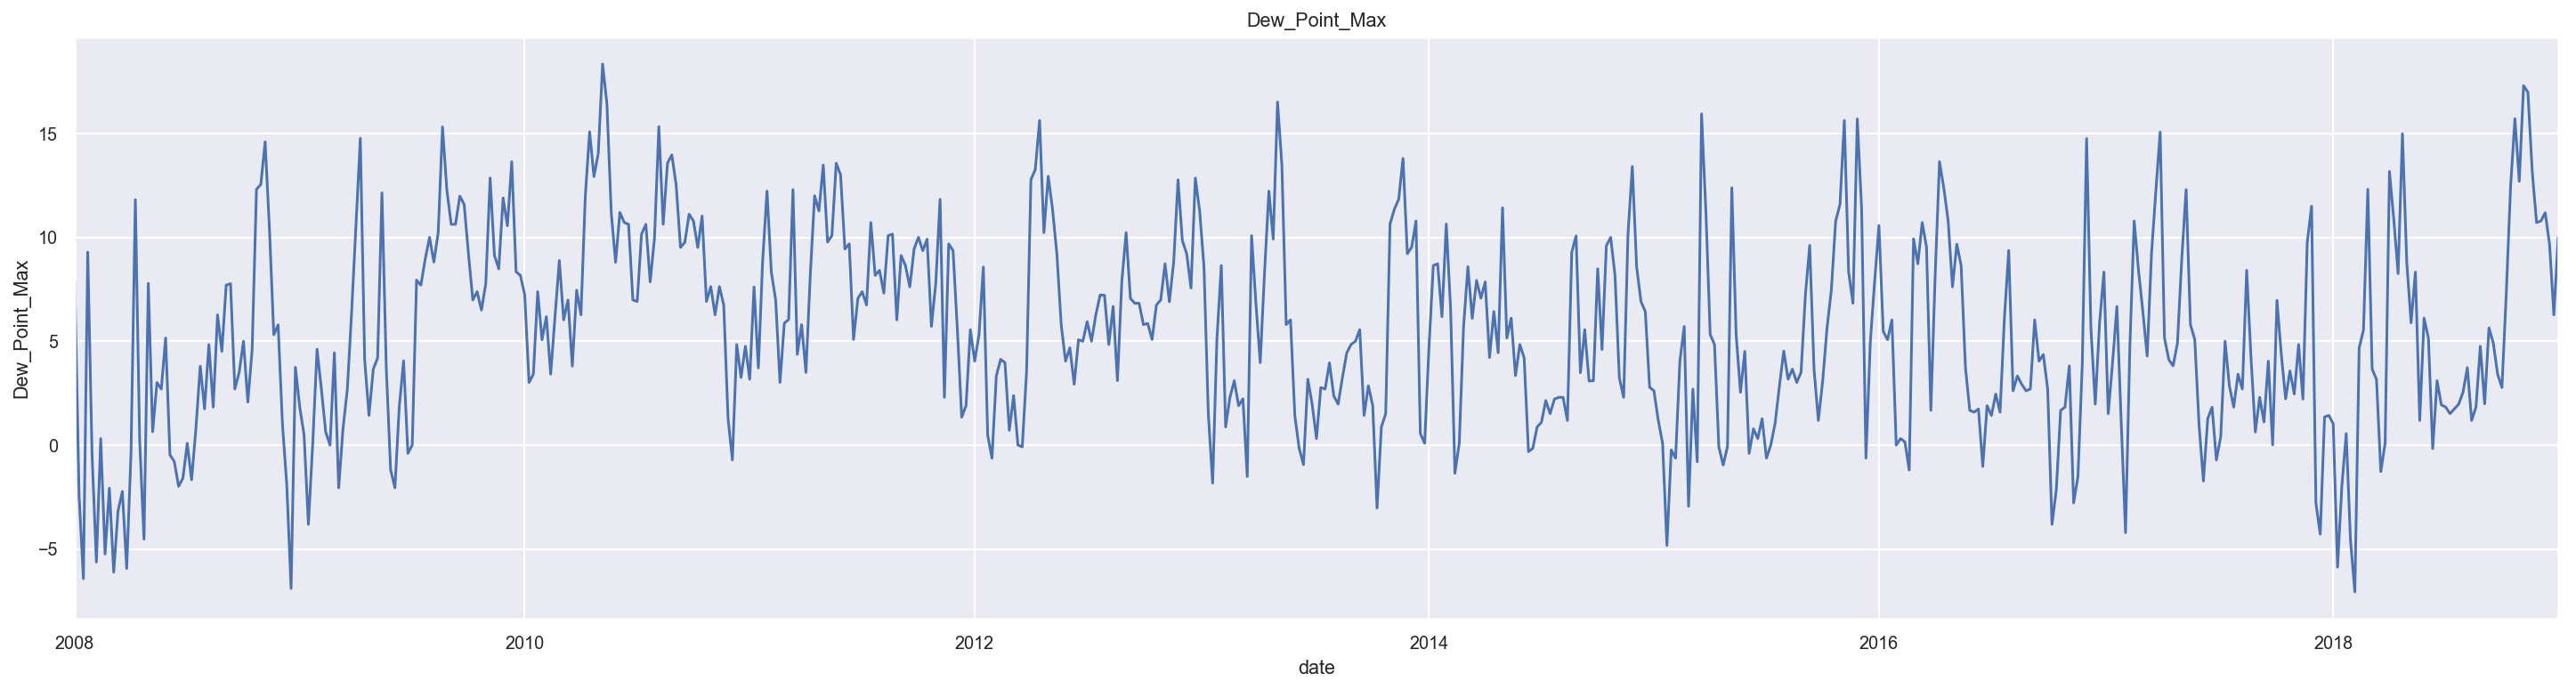

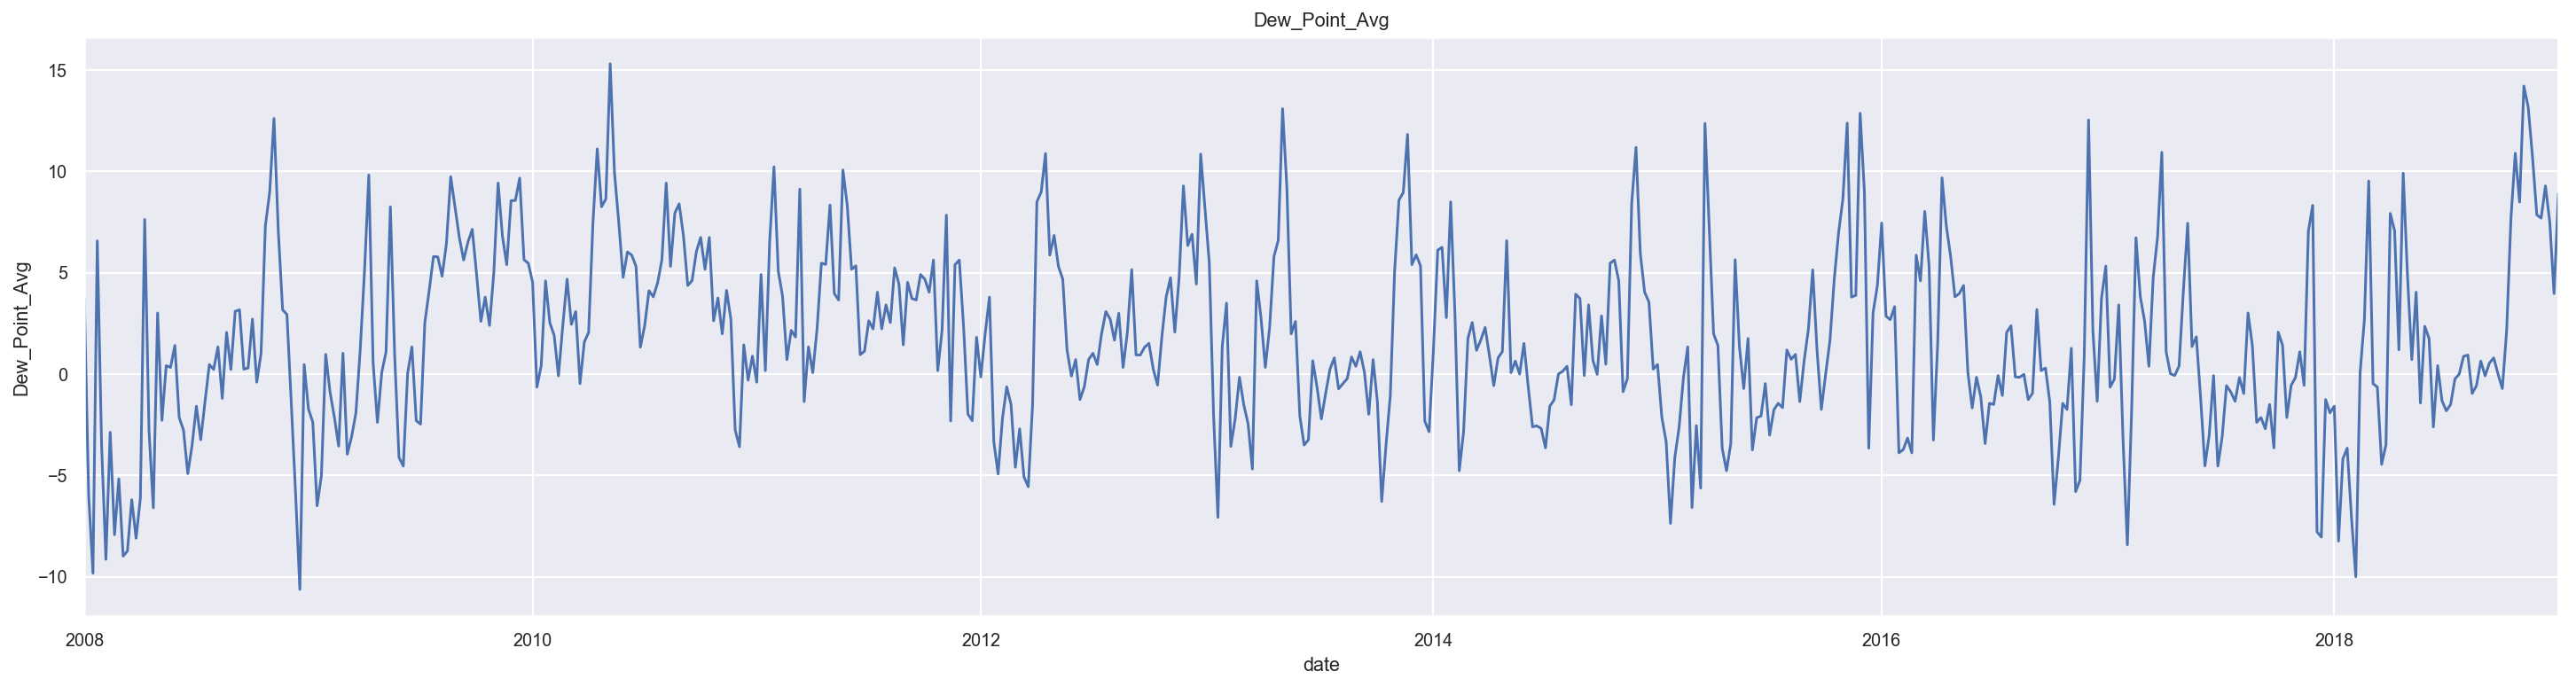

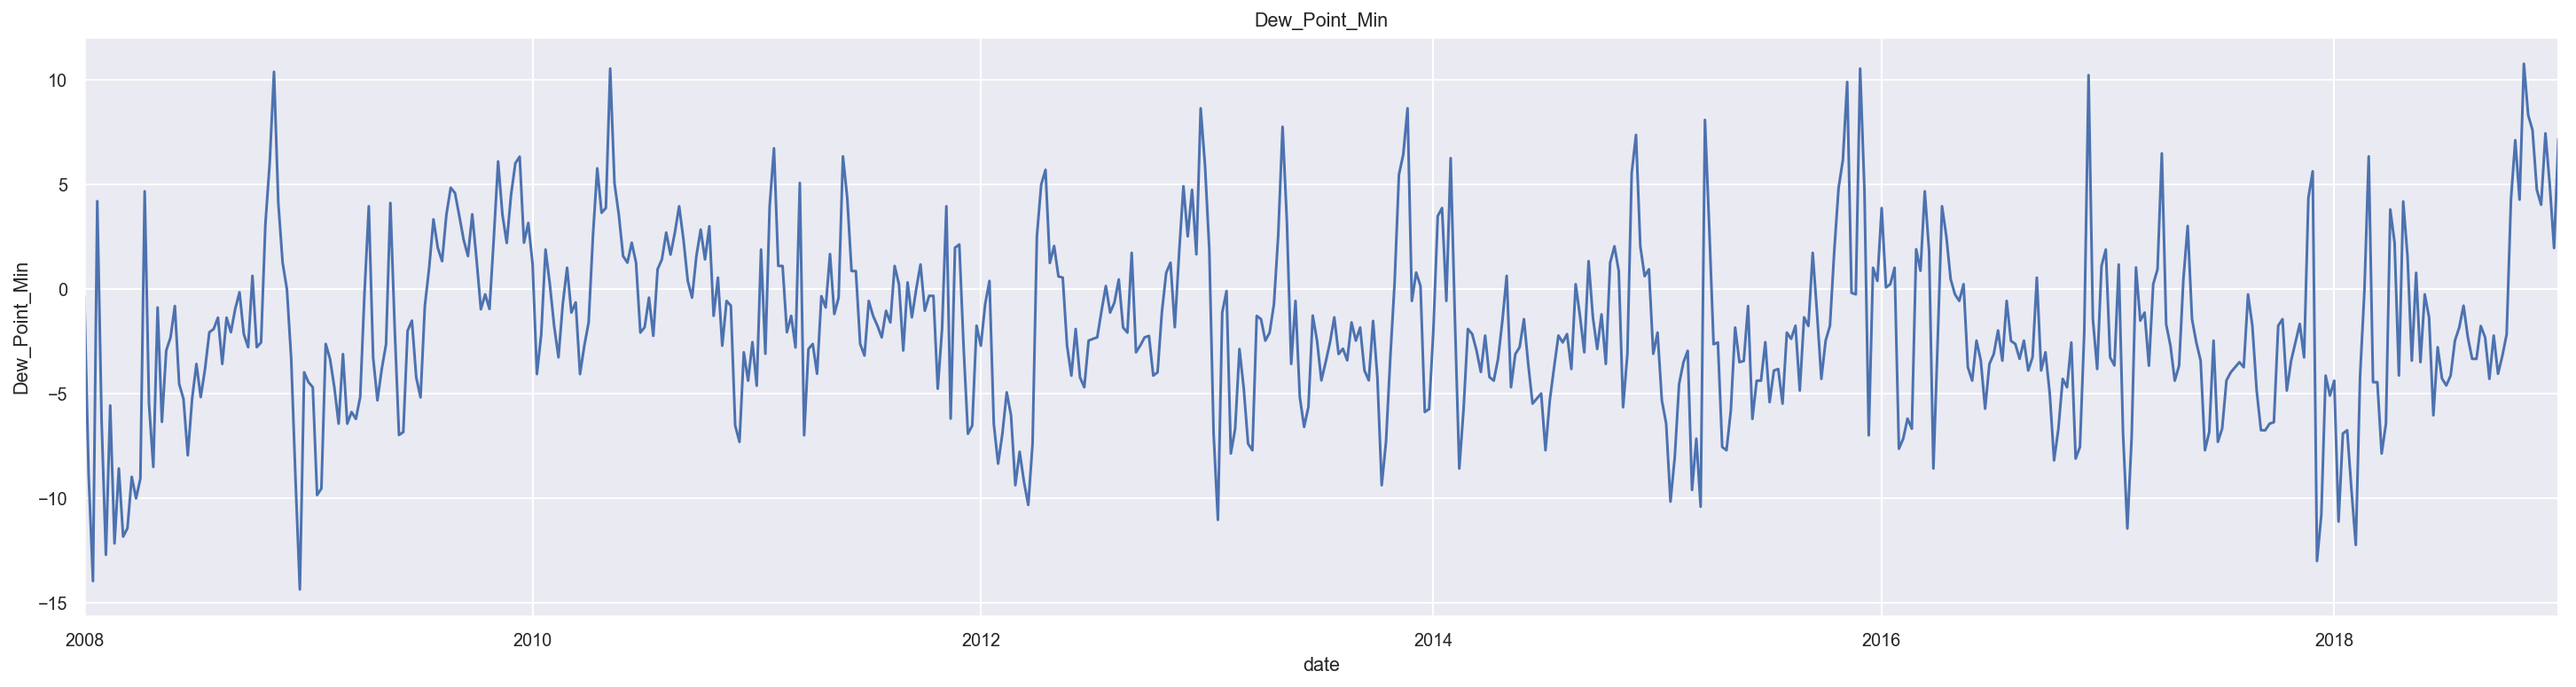

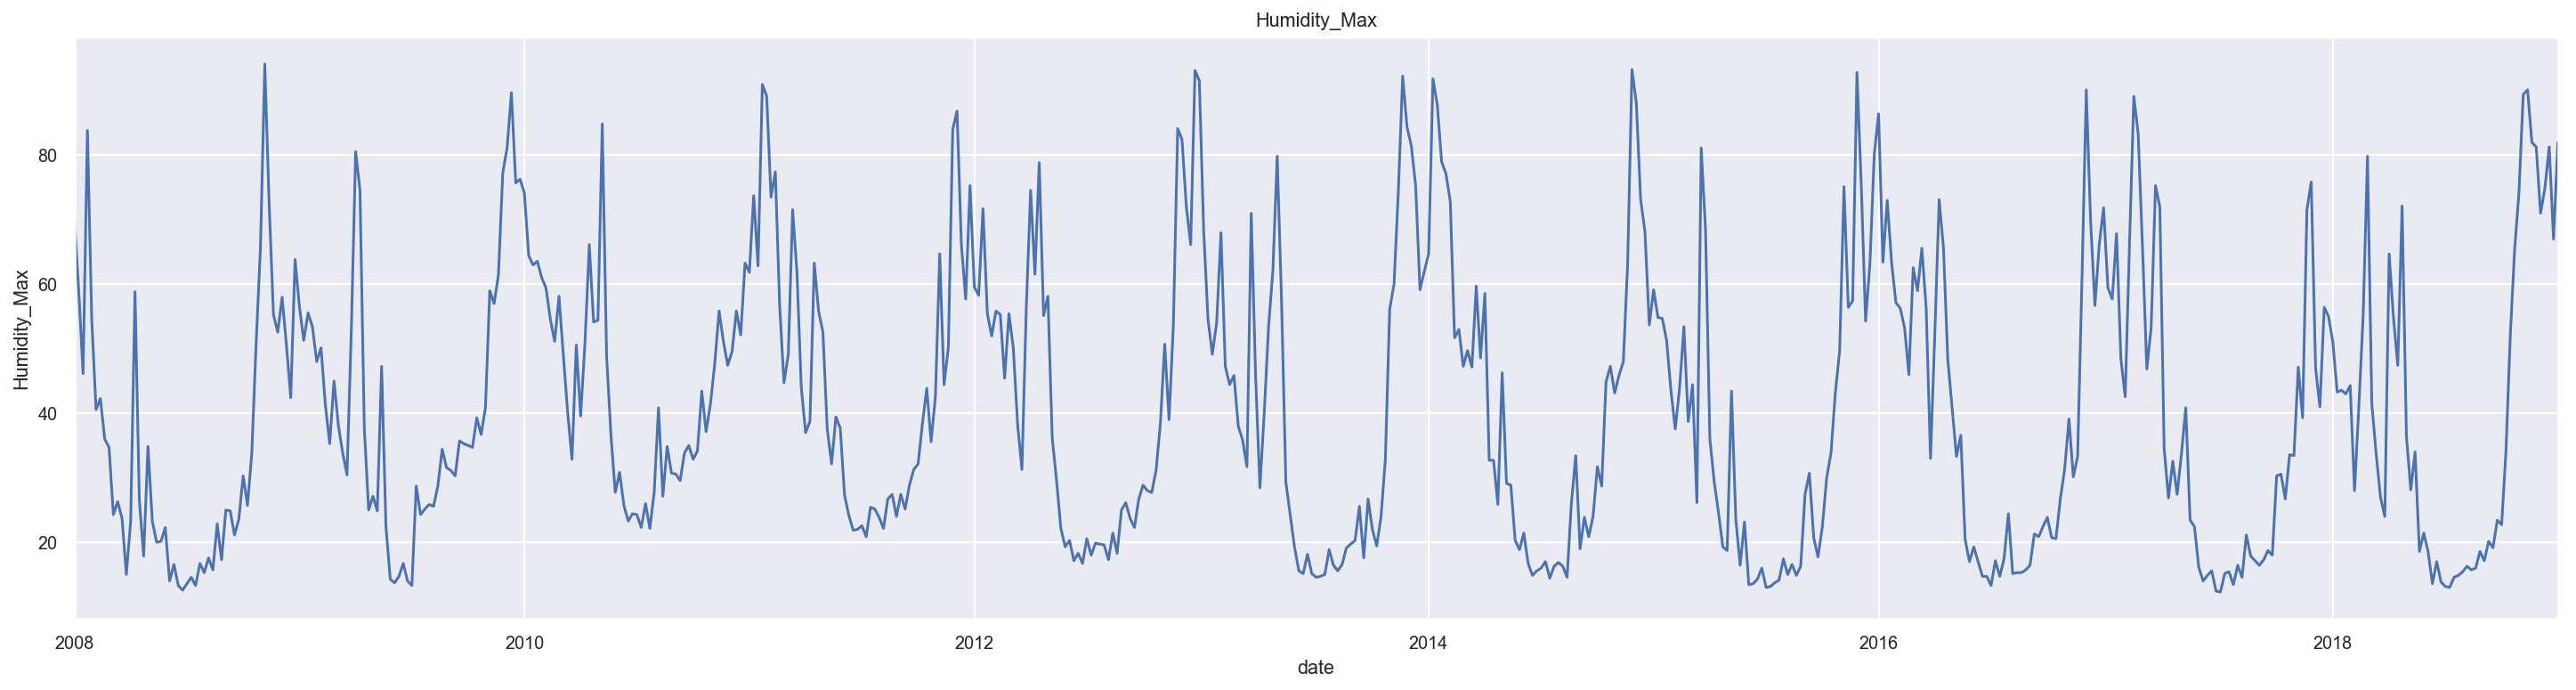

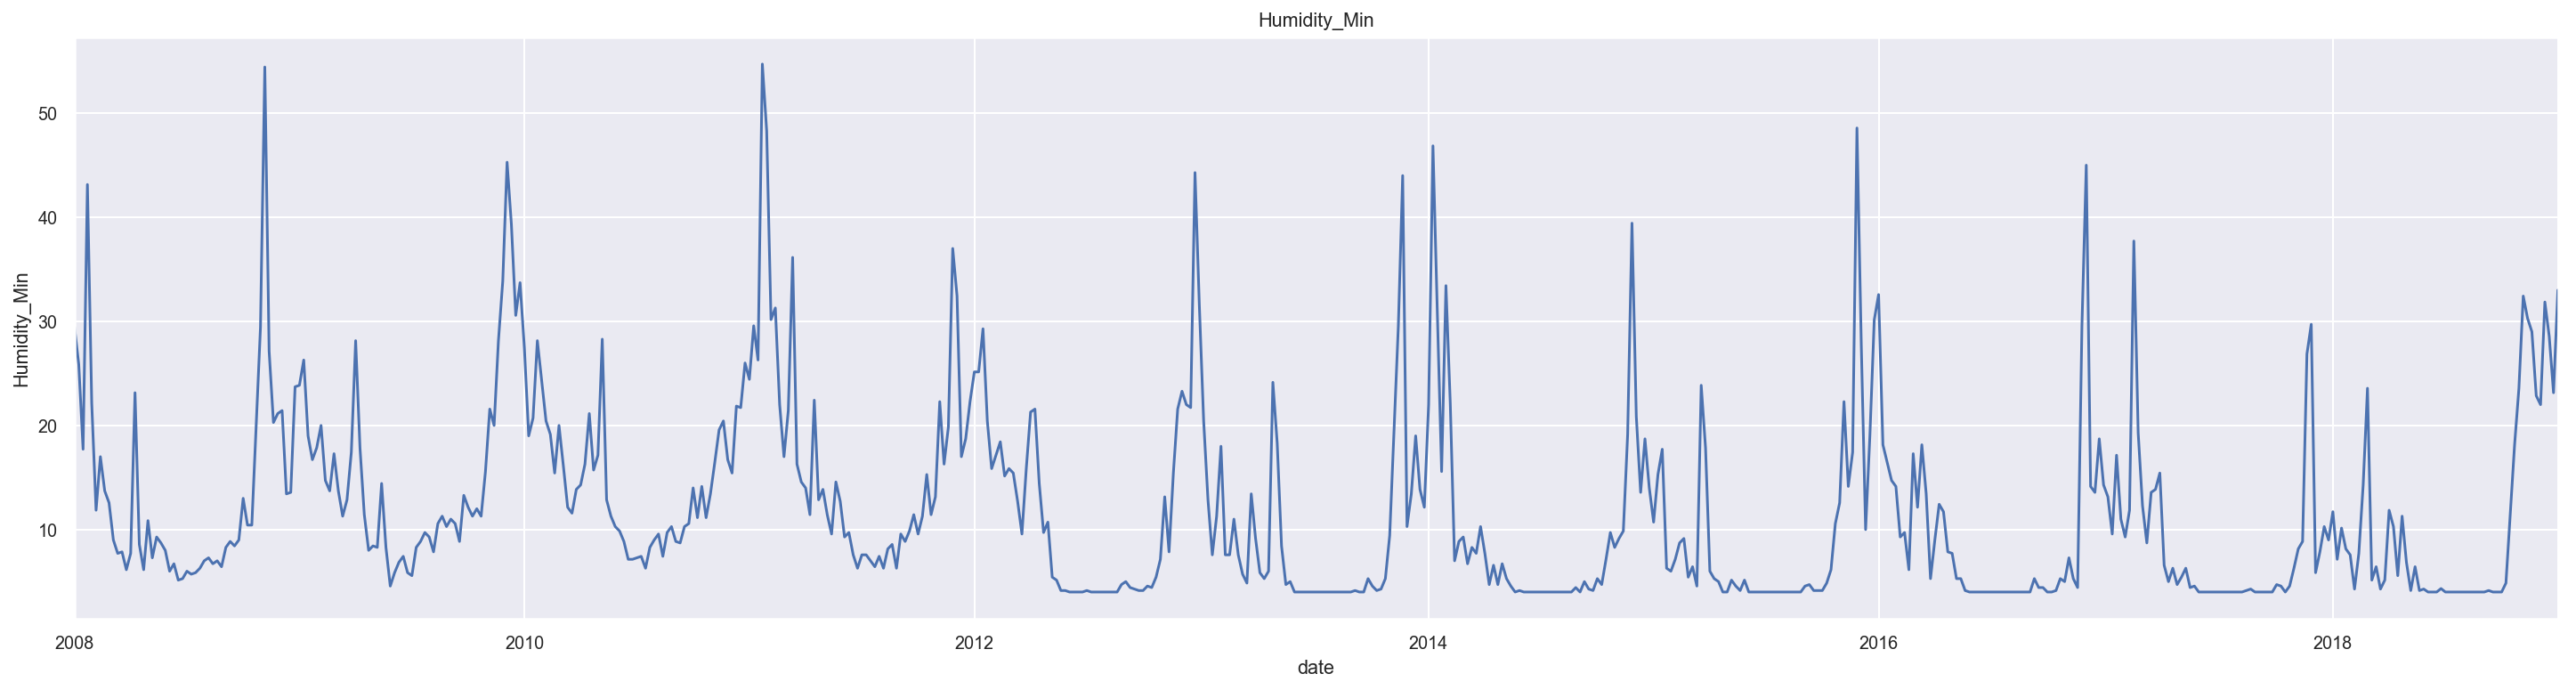

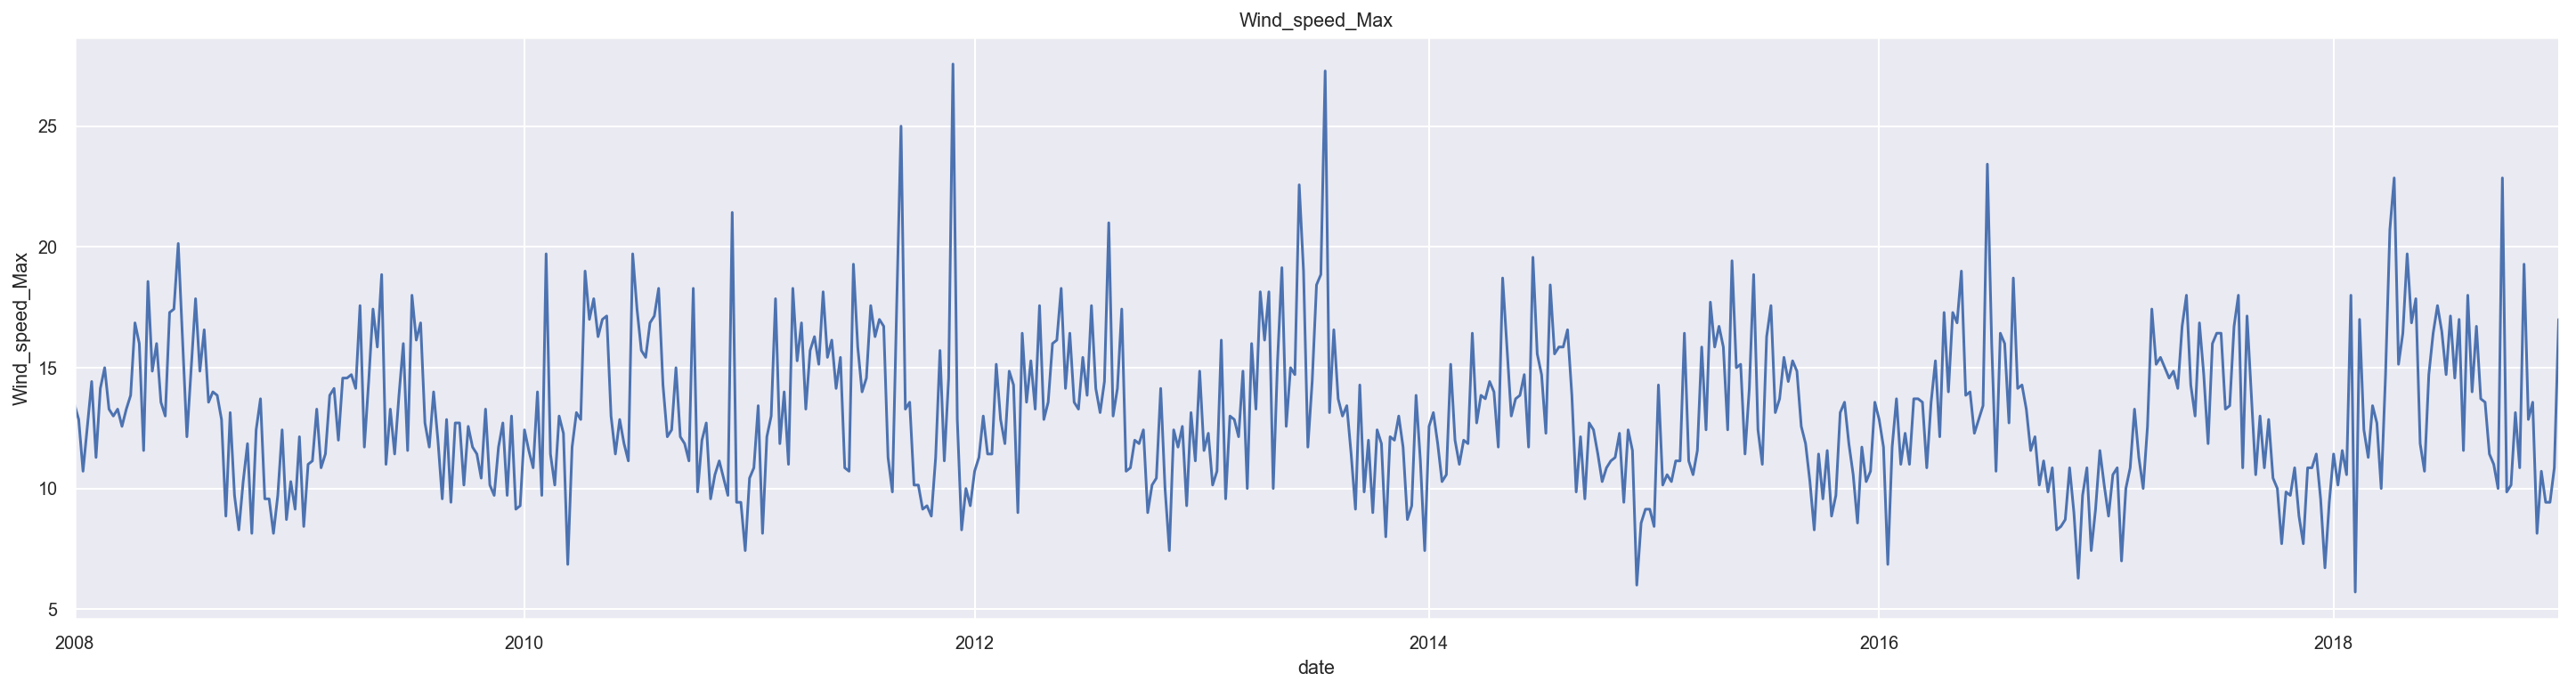

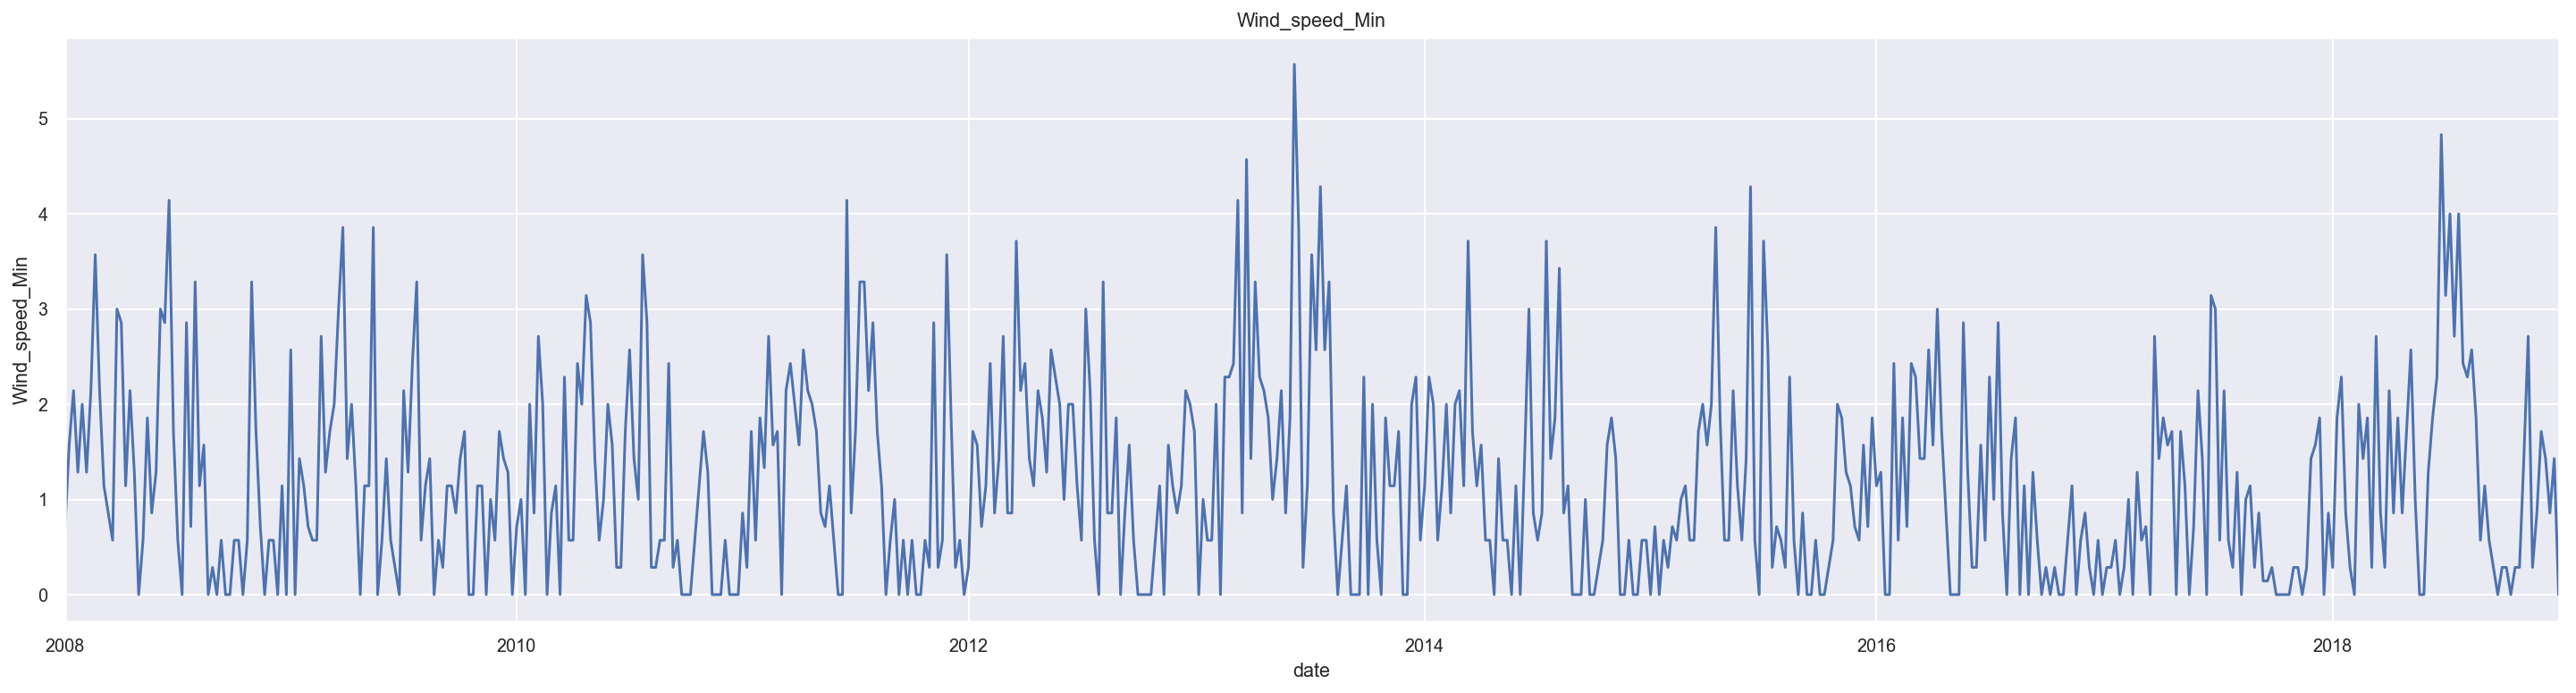

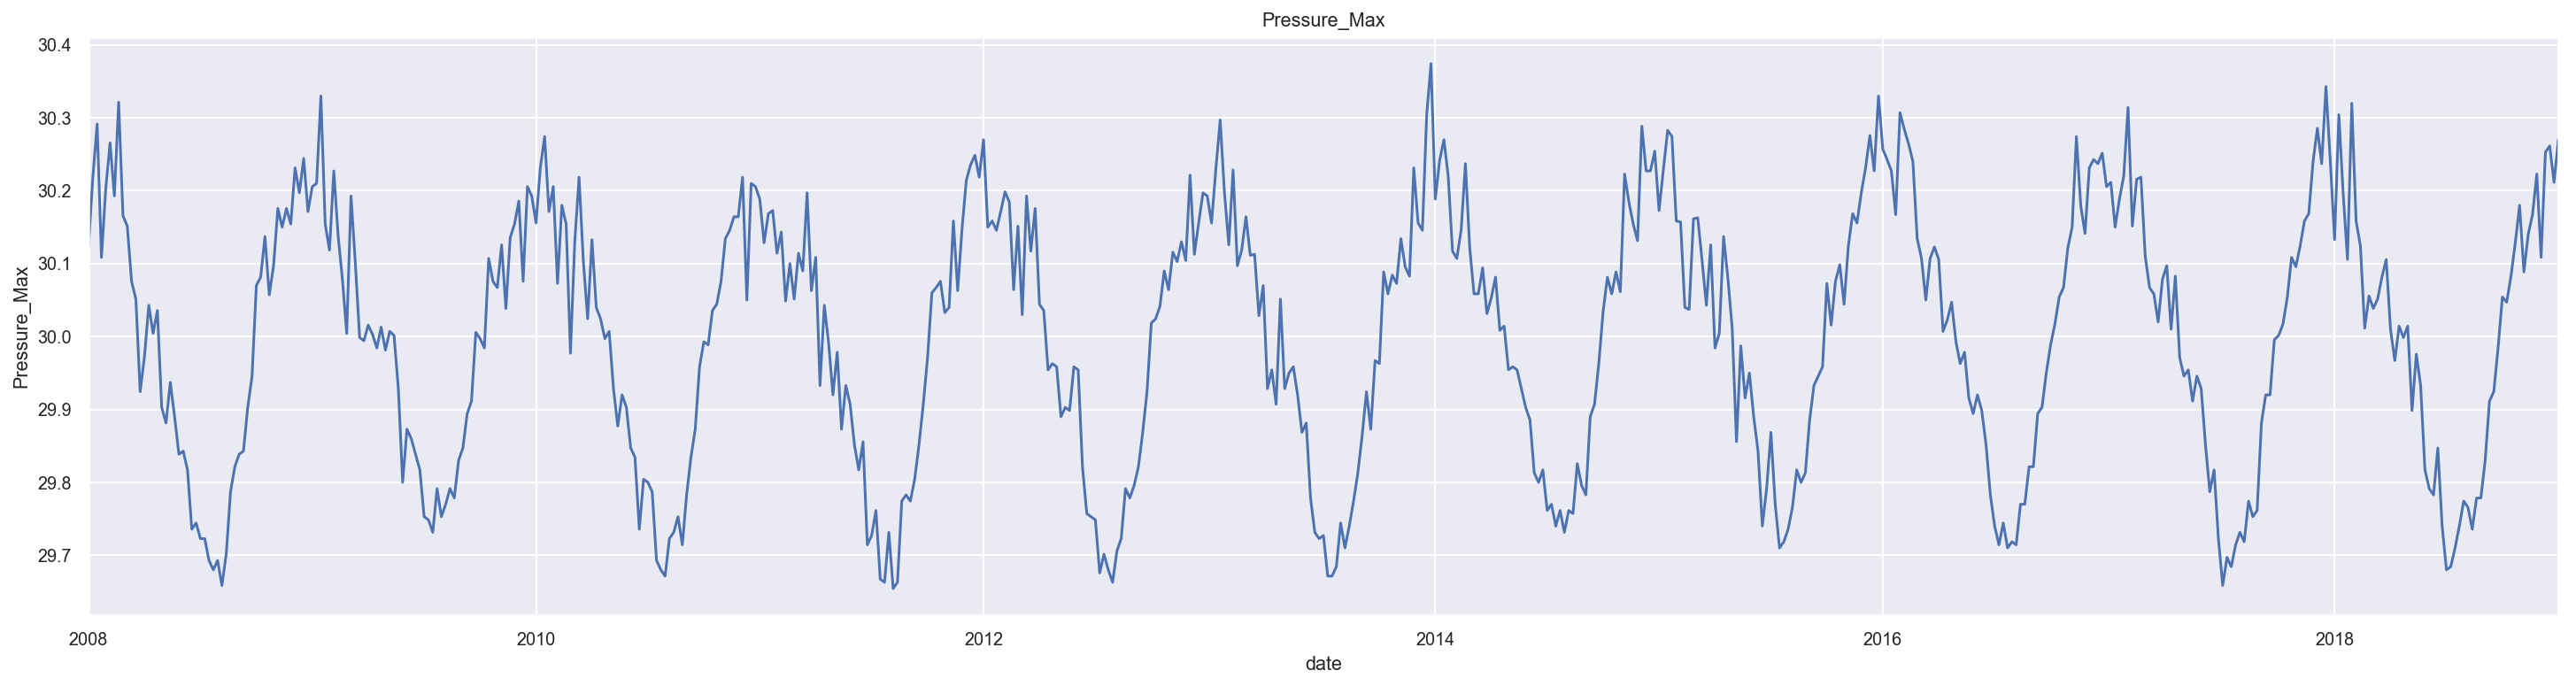

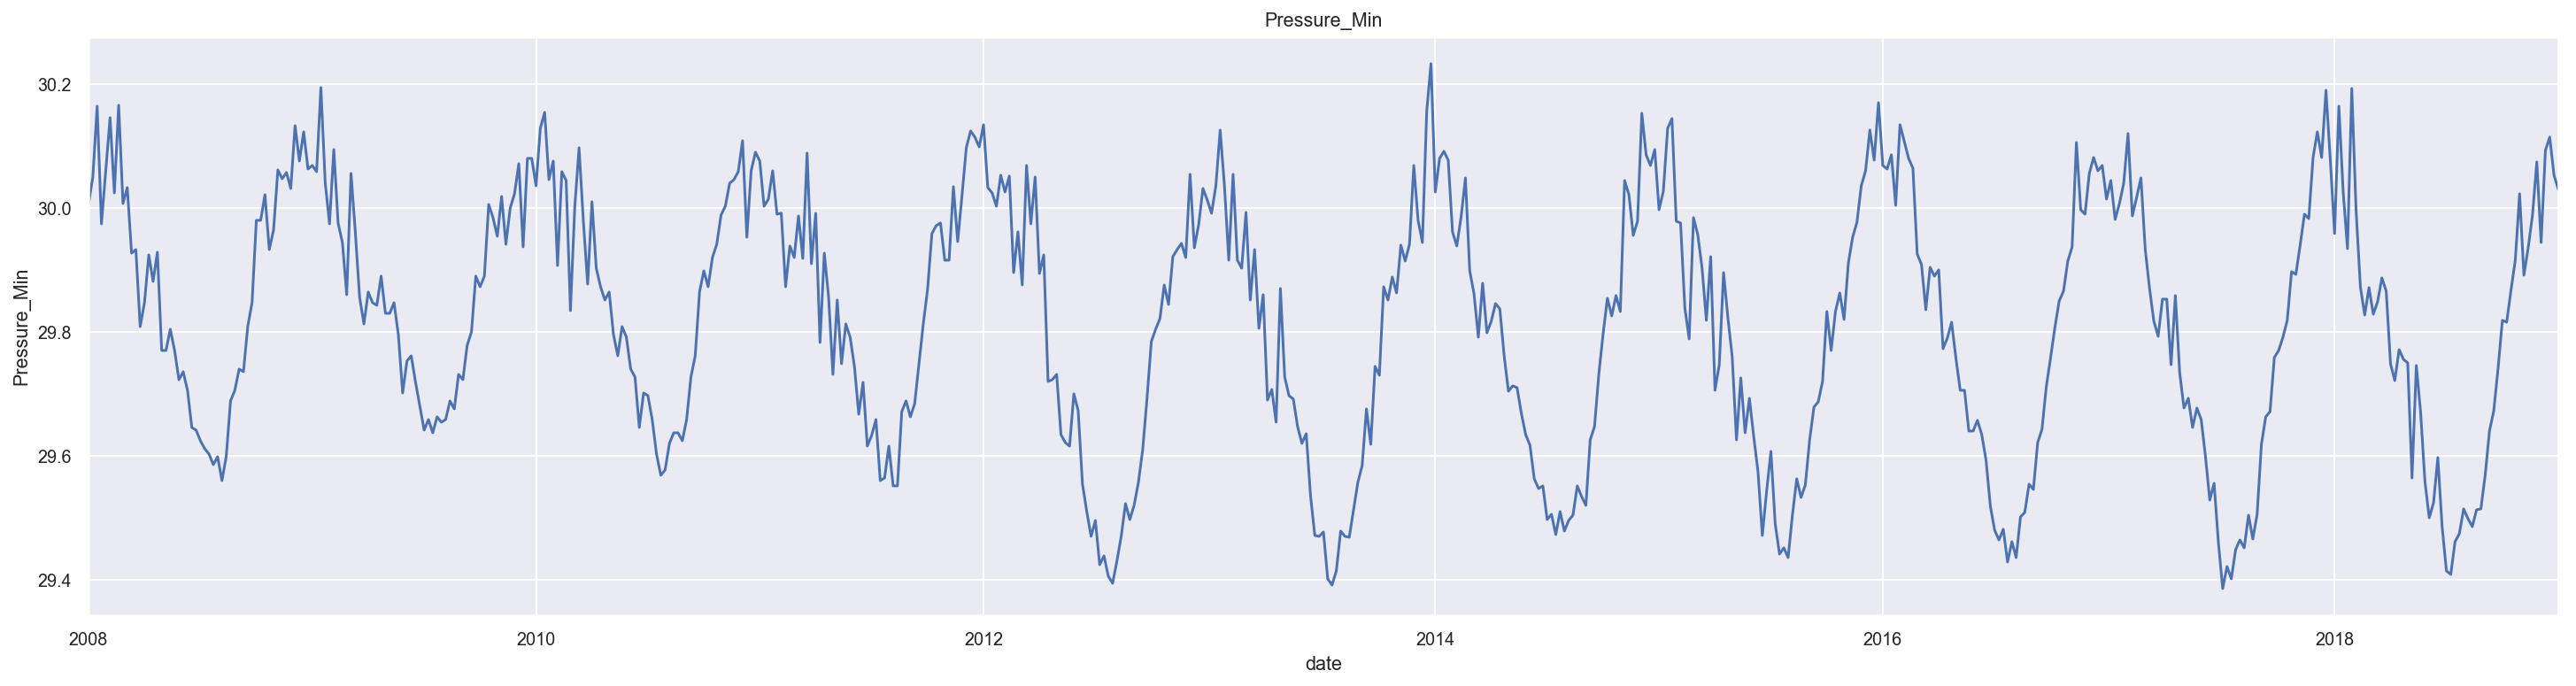

In [21]:
for col in resampled.columns[:-3]:
    plt.figure(figsize=(25,6))
    resampled[col].plot()
    plt.ylabel(col)
    plt.title(col)
    plt.show()

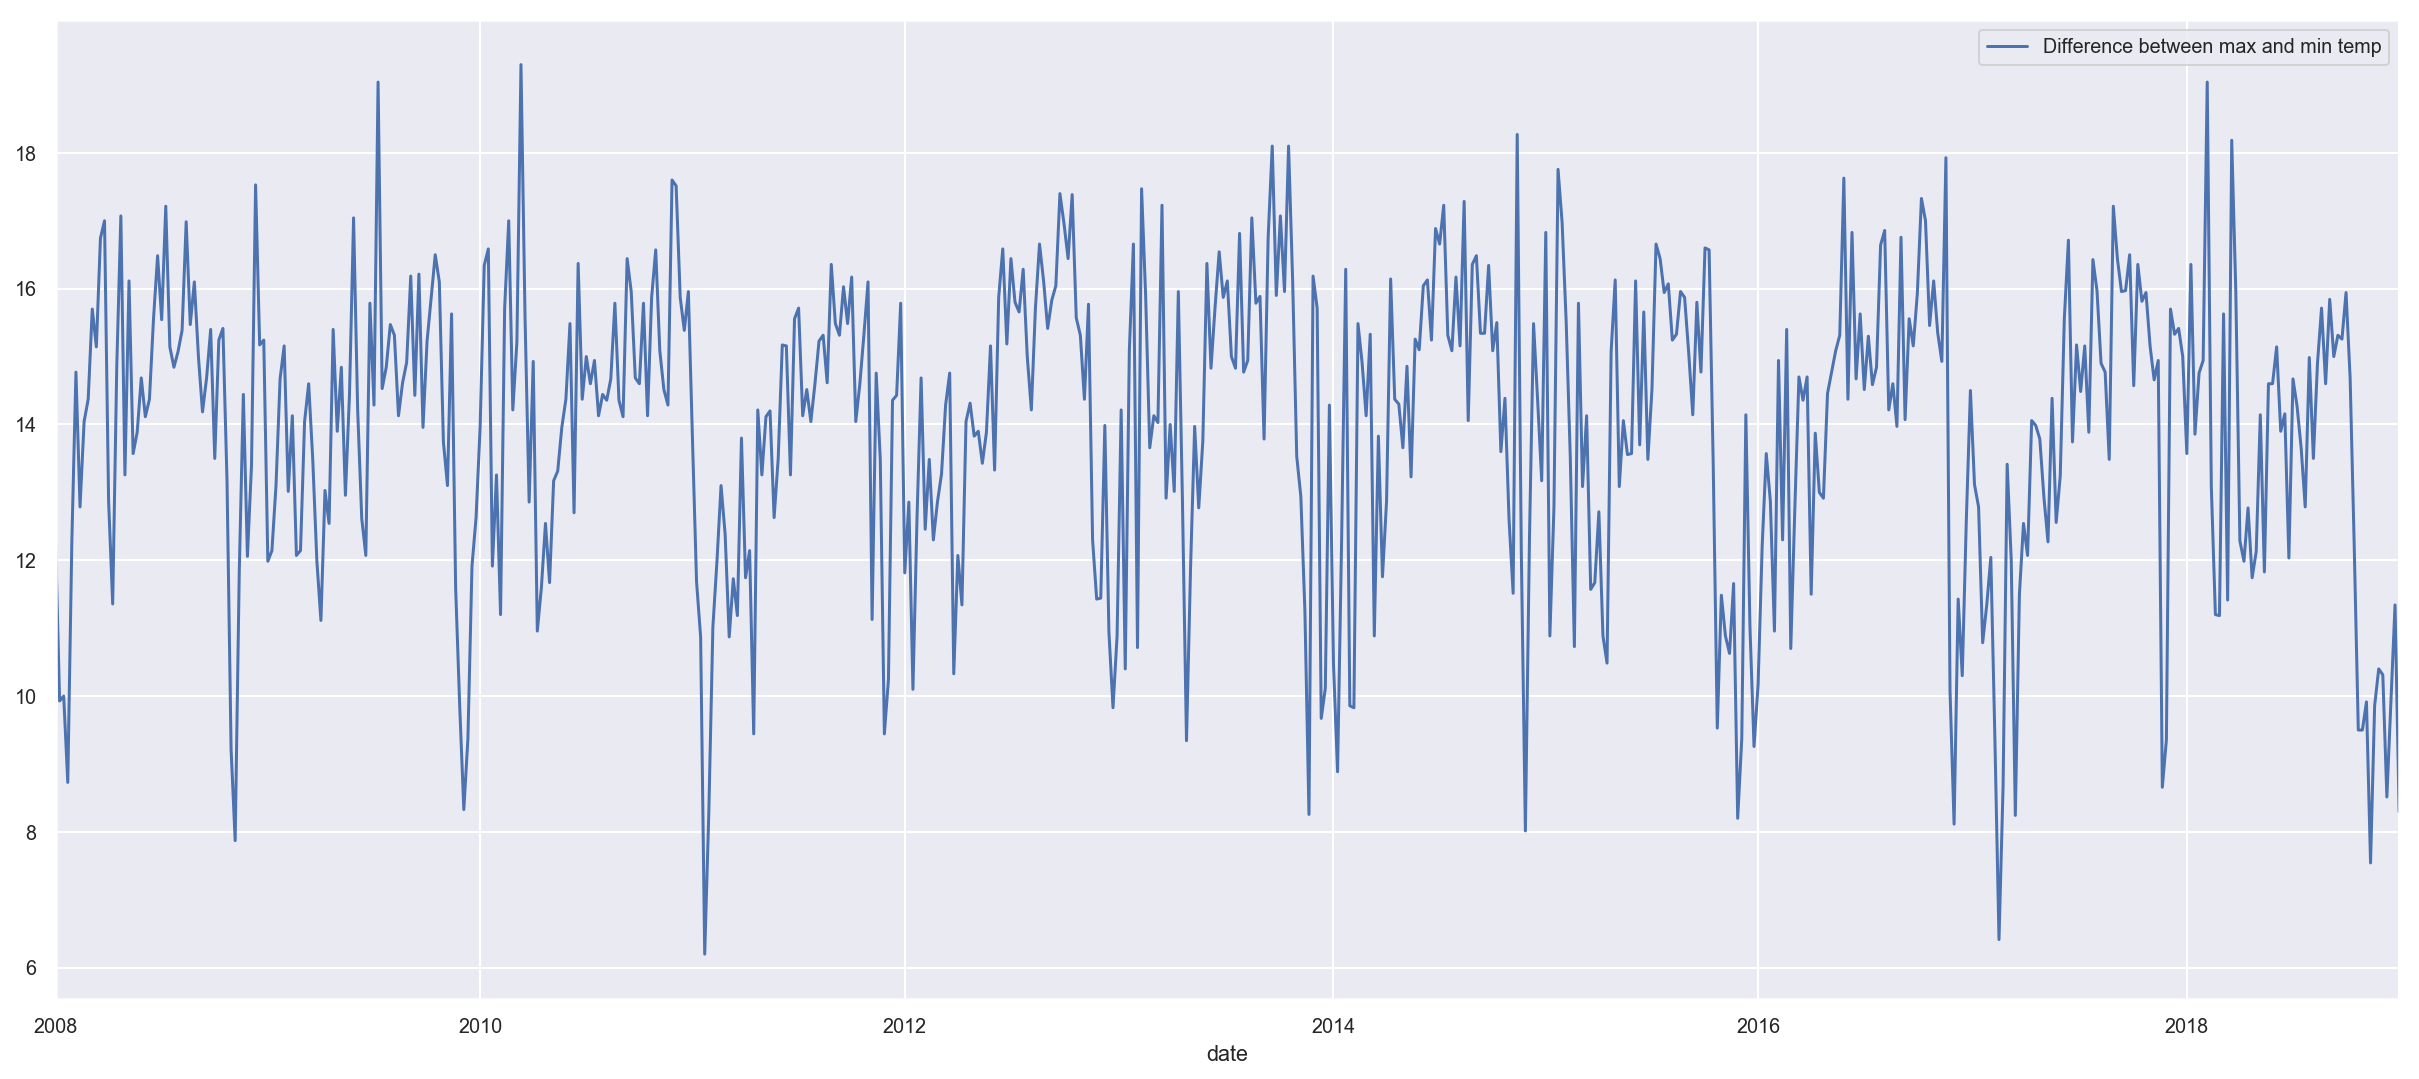

In [22]:
plt.figure(figsize=(21, 9))
diff_temp = resampled.Temperature_Max - resampled.Temperature_Min
diff_temp.plot(label='Difference between max and min temp')
plt.legend();

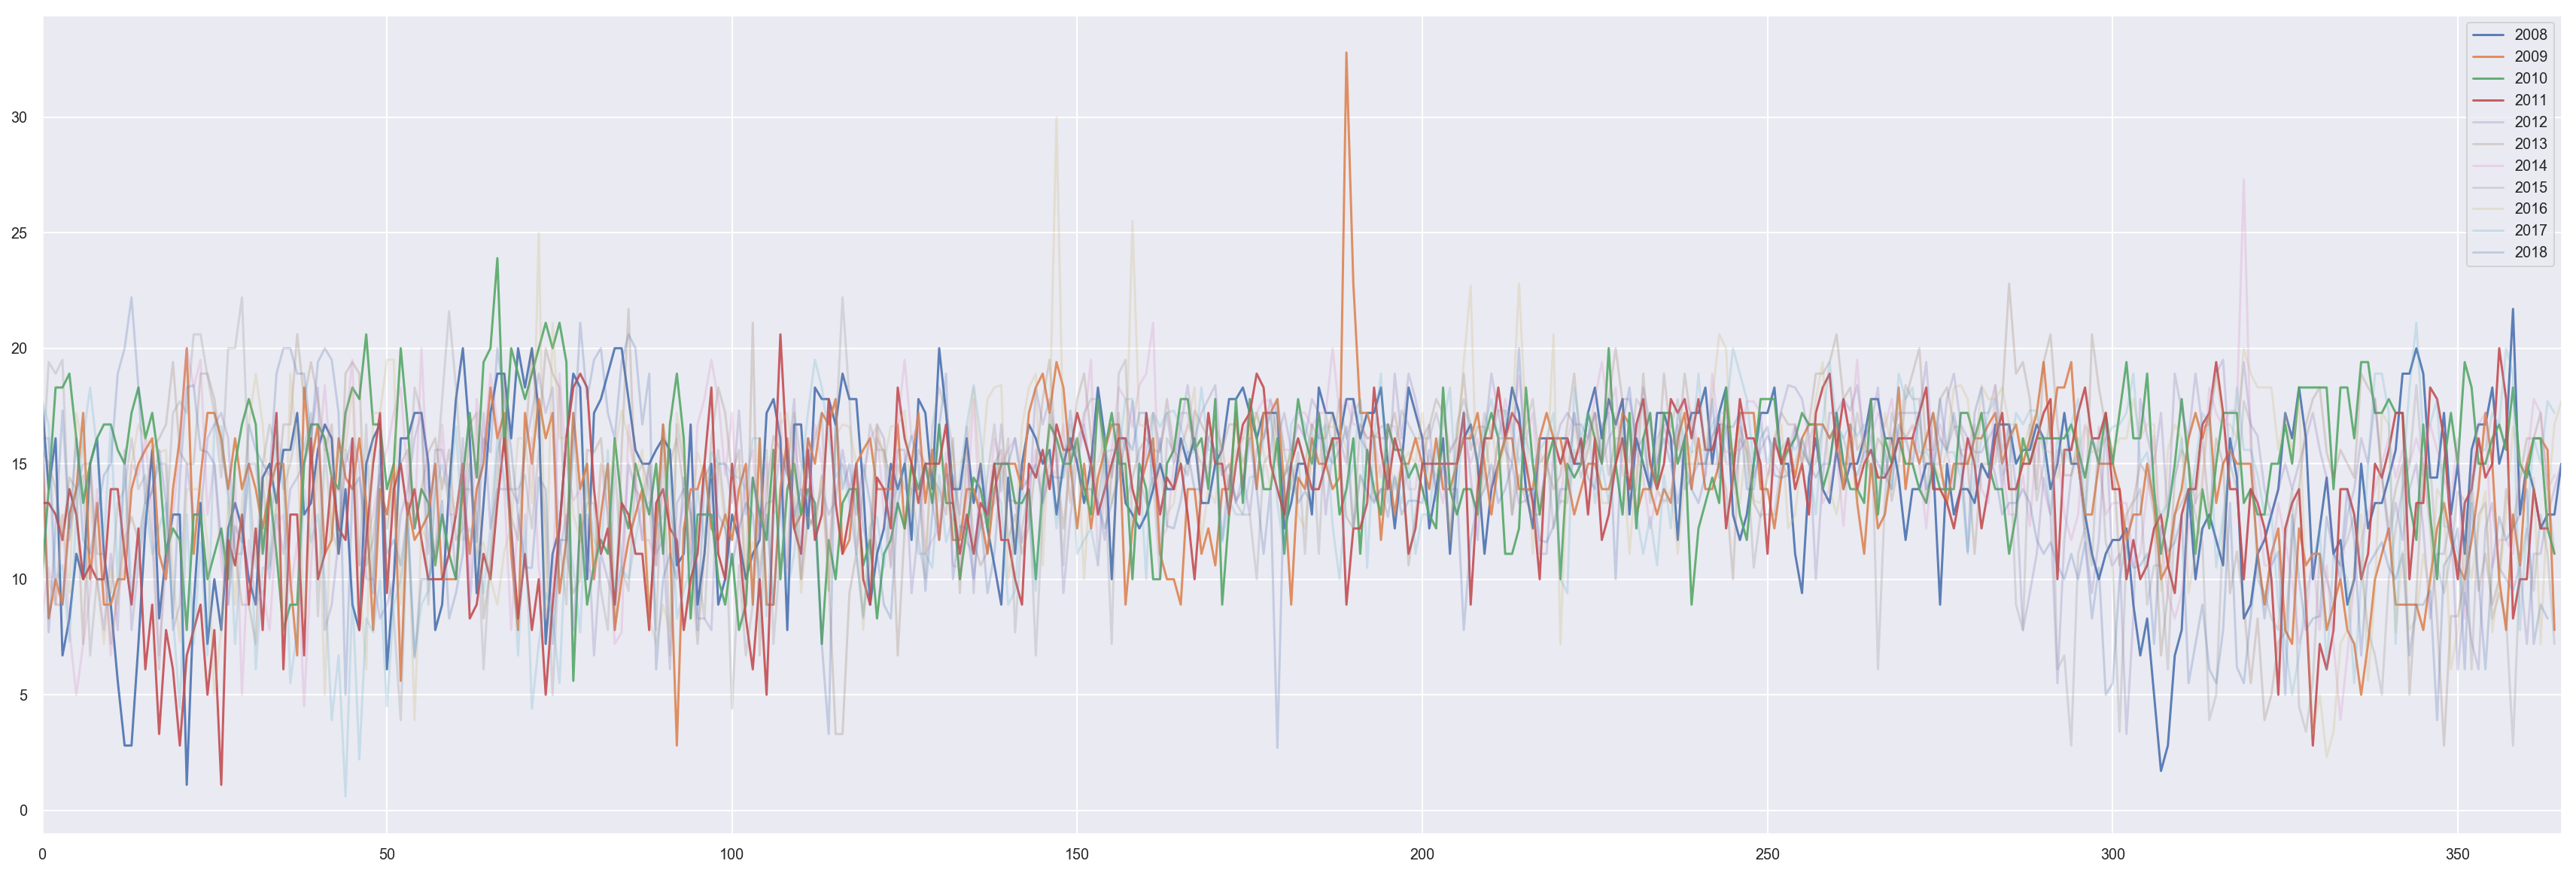

In [23]:
plt.figure(figsize=(30,10))
for yr in range(2008, 2019):
    (weather_df.loc[str(yr), :].reset_index().Temperature_Max - weather_df.loc[str(yr), :].reset_index().Temperature_Min).plot(alpha=(.9 if yr < 2012 else .25), label=yr)
plt.legend();

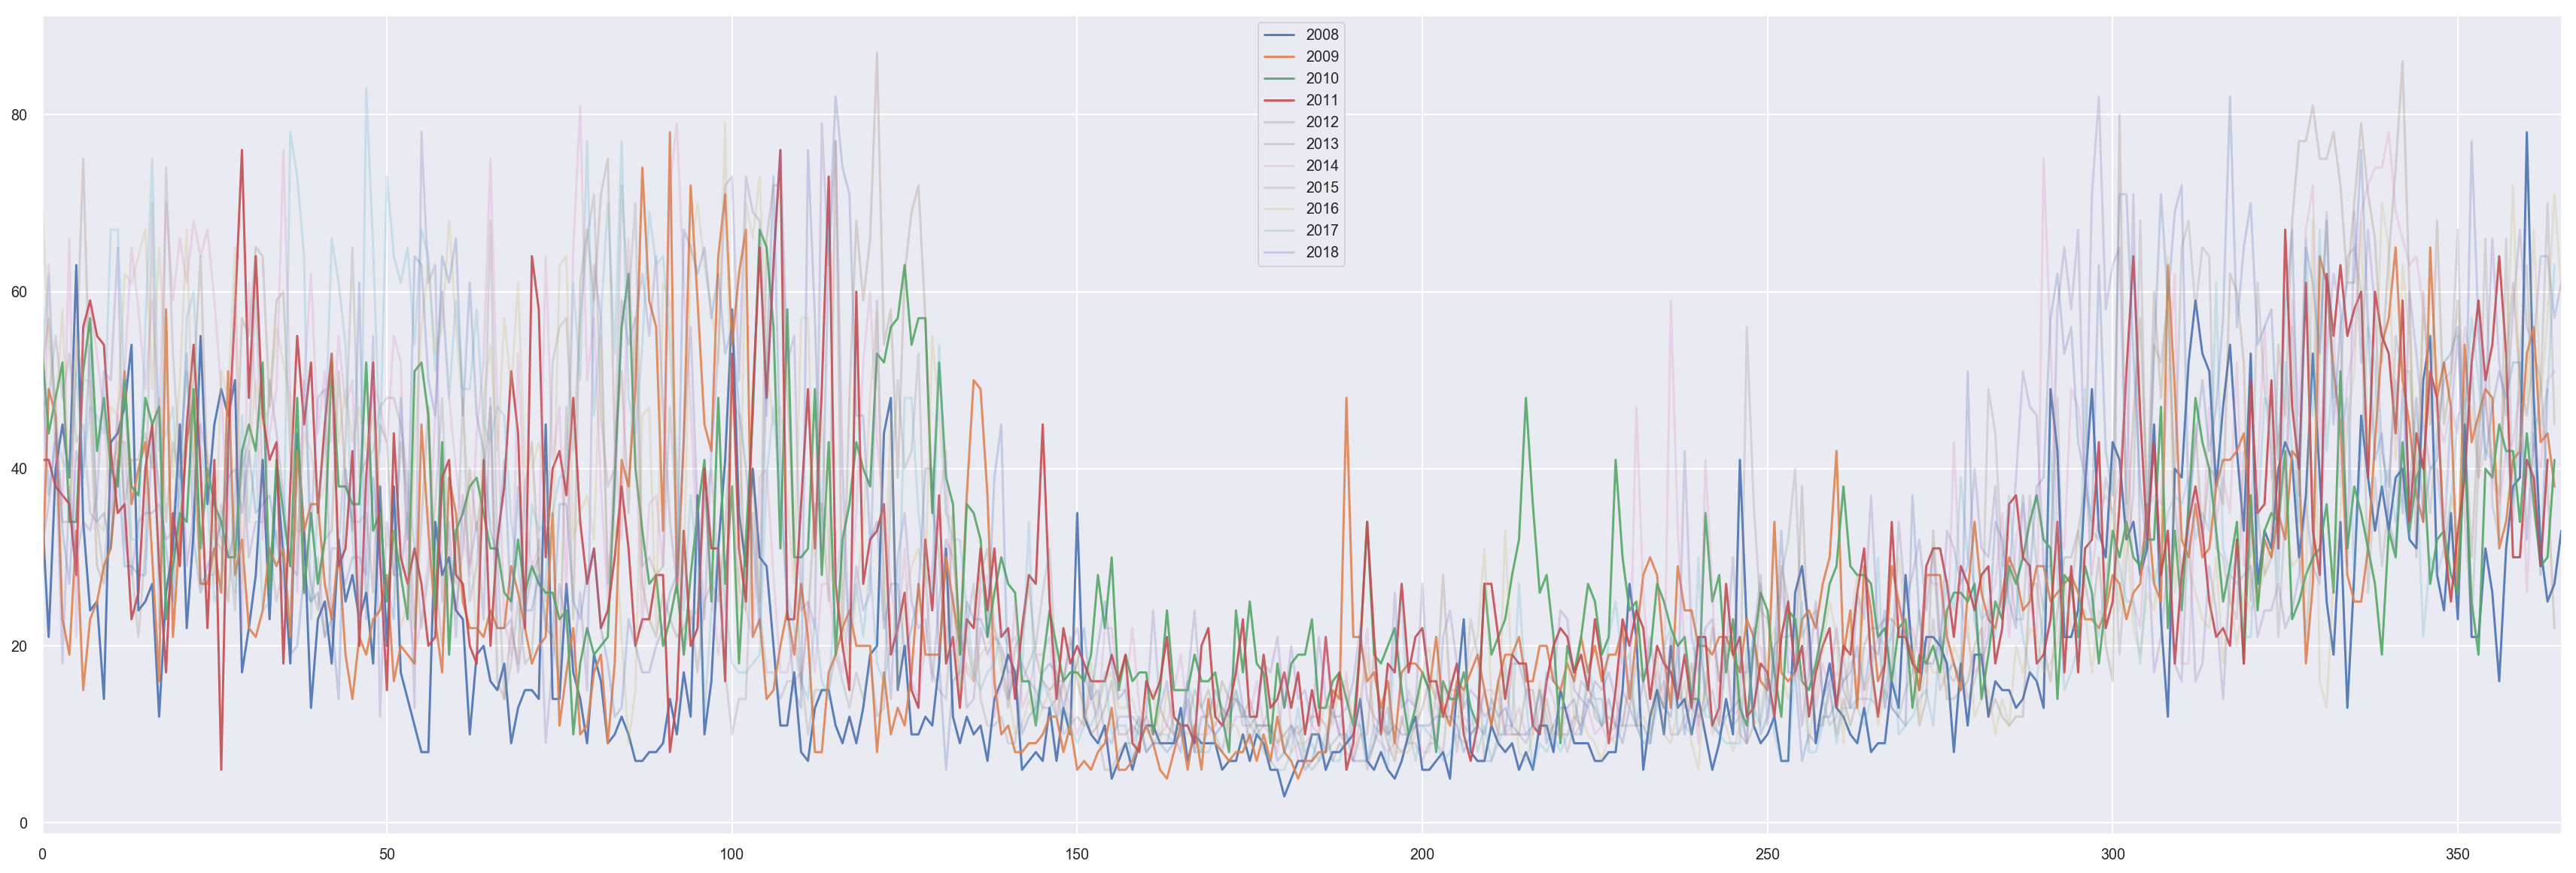

In [24]:
plt.figure(figsize=(30,10))
for yr in range(2008, 2019):
    (weather_df.loc[str(yr), :].reset_index().Humidity_Max - weather_df.loc[str(yr), :].reset_index().Humidity_Min).plot(alpha=(.9 if yr < 2012 else .25), label=yr)
plt.legend();

In [25]:
weather_df.columns

Index(['Temperature_Max', 'Temperature_Avg', 'Temperature_Min',
       'Dew_Point_Max', 'Dew_Point_Avg', 'Dew_Point_Min', 'Humidity_Max',
       'Humidity_Min', 'Wind_speed_Max', 'Wind_speed_Min', 'Pressure_Max',
       'Pressure_Min', 'year', 'month', 'day'],
      dtype='object')

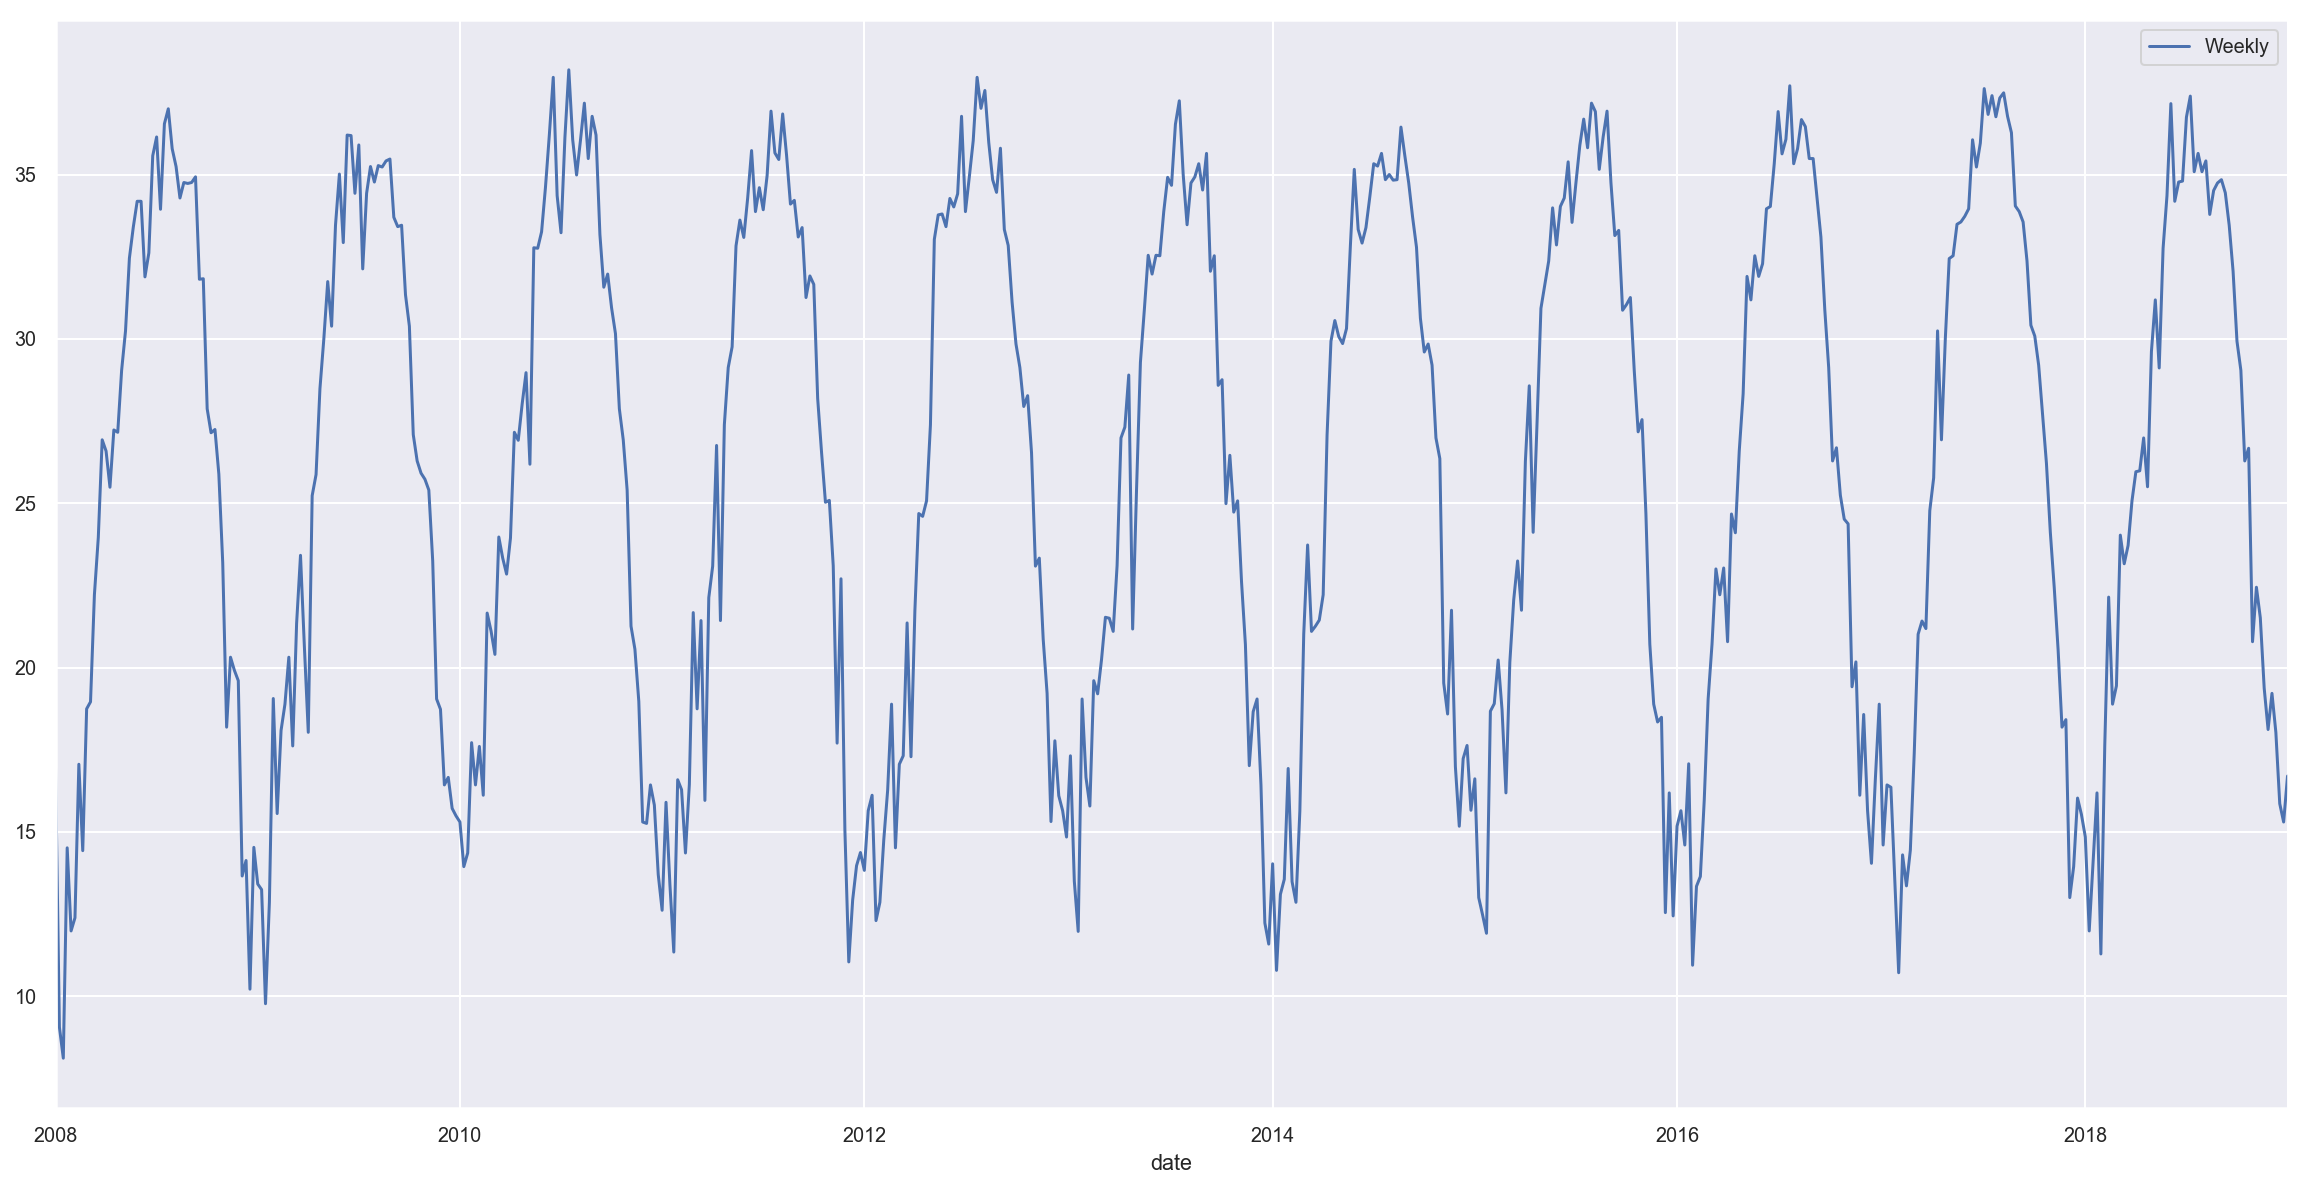

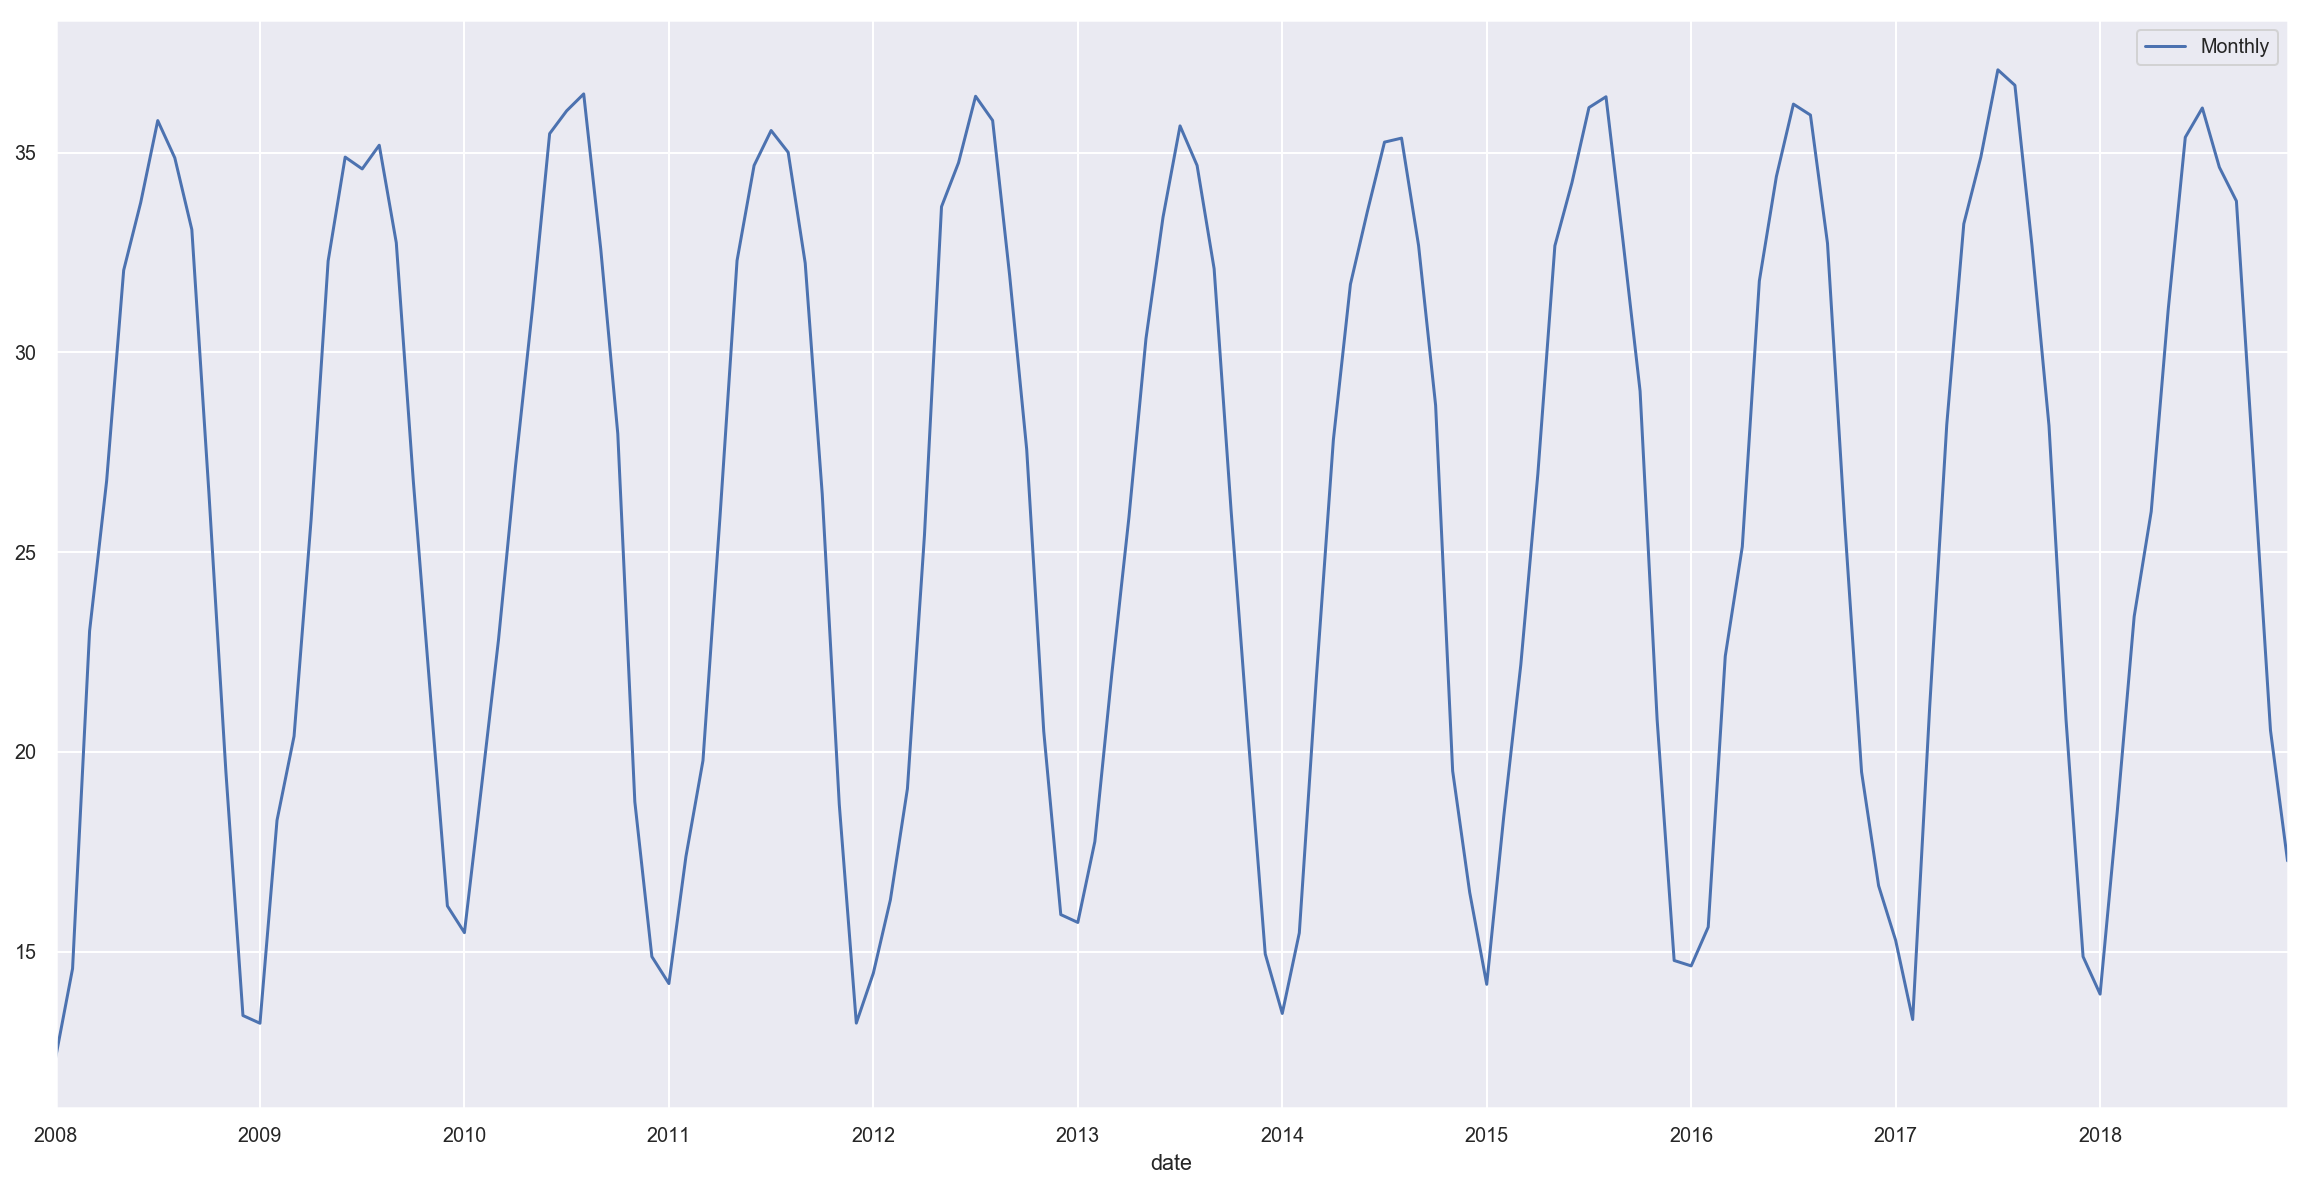

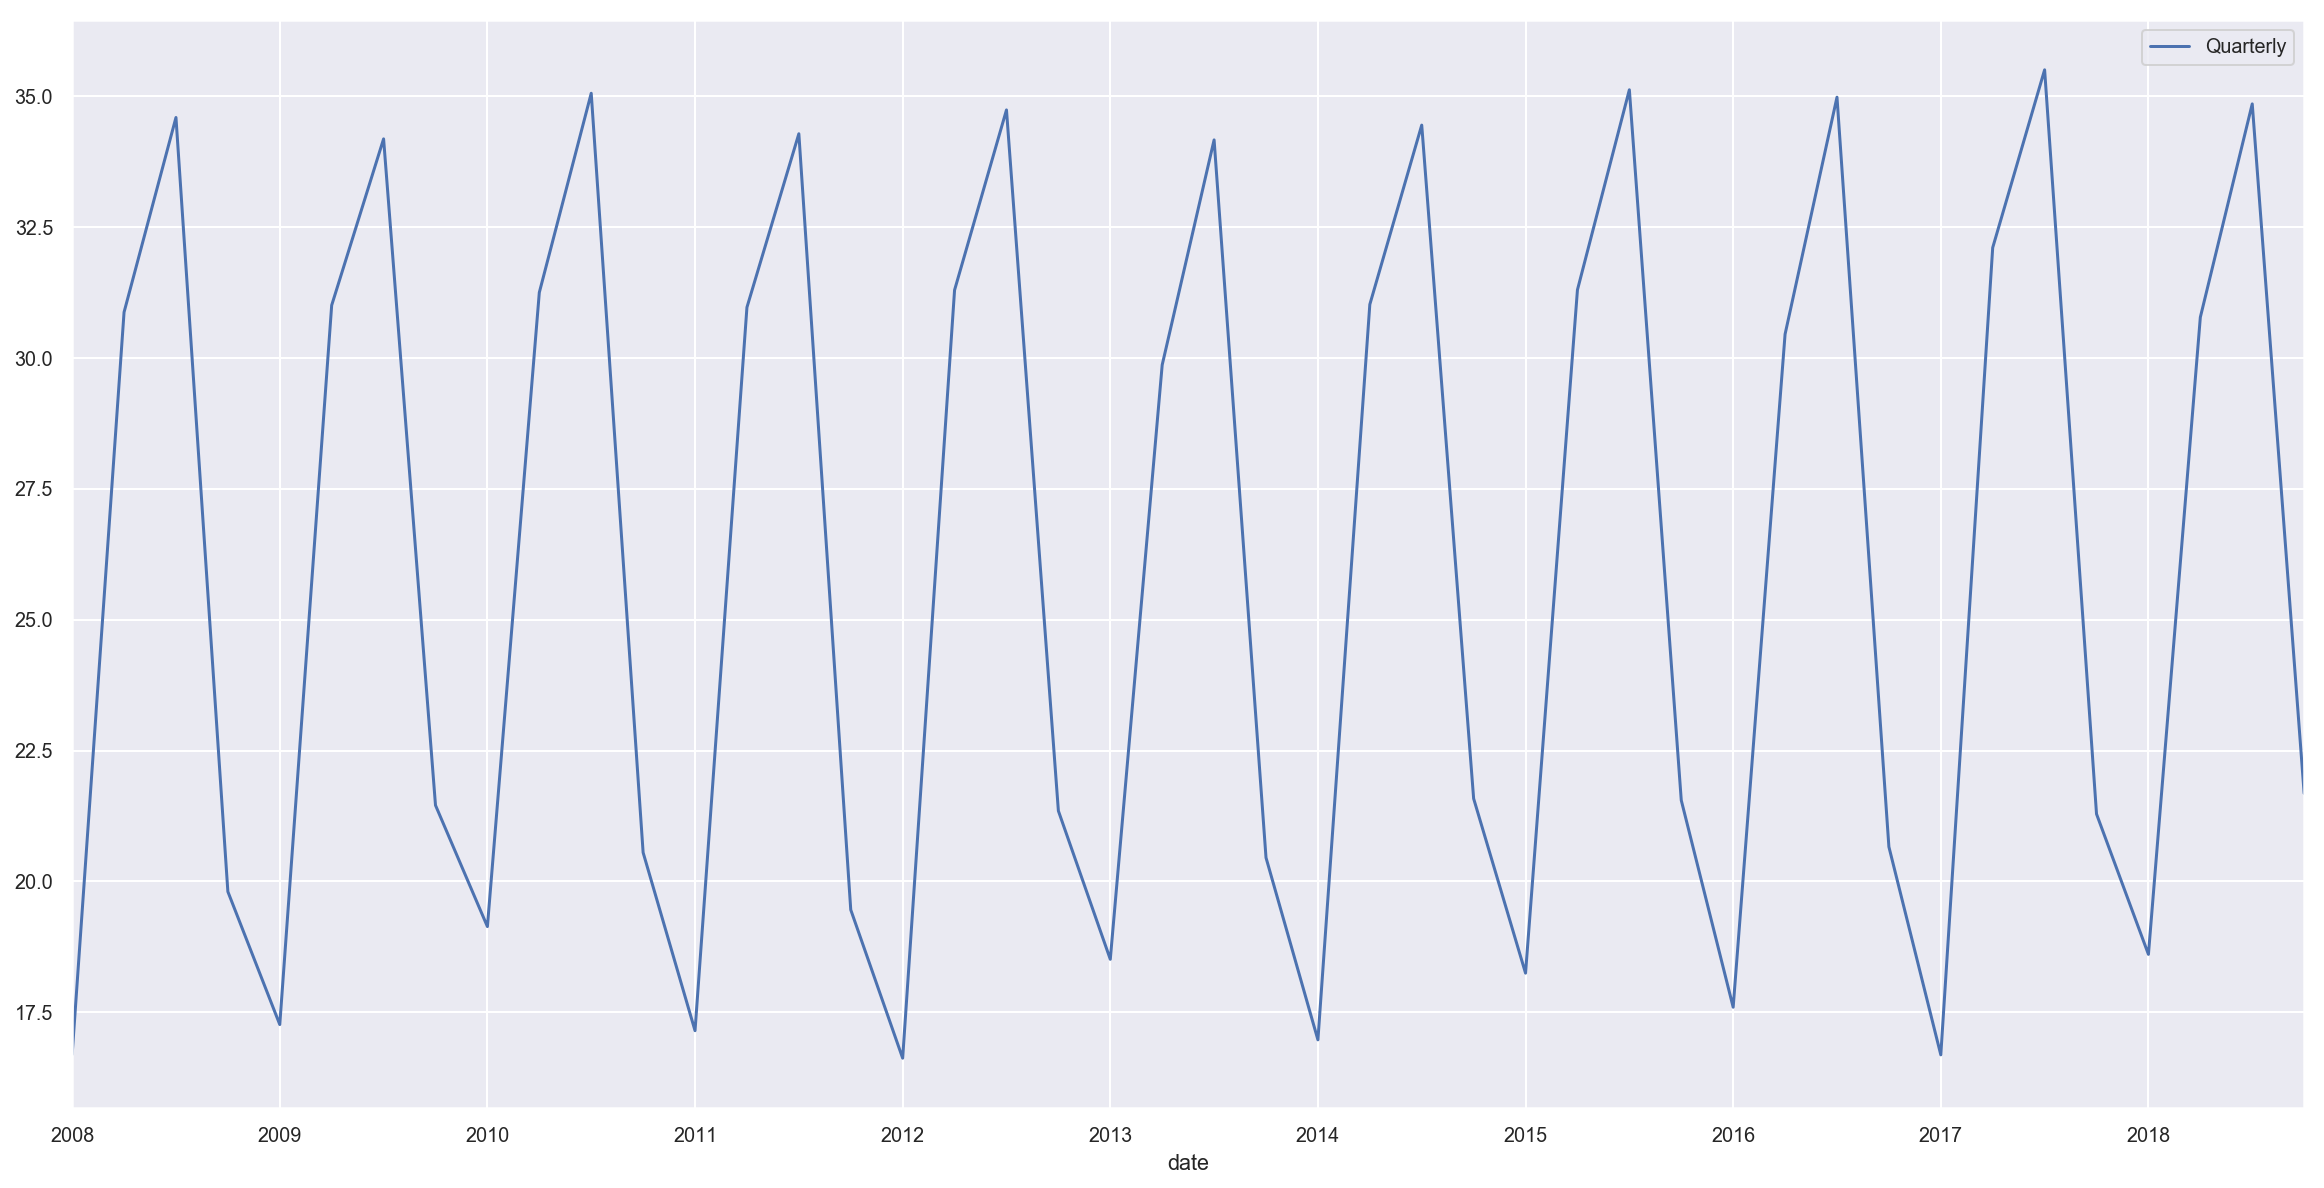

In [26]:
# Let's check average temprature for stationarity:
resampled_weakly = weather_df.resample('W').mean()
resampled_monthly = weather_df.resample('M').mean()
resampled_annually = weather_df.resample('Q').mean()
resampled_list =  {'Weekly': resampled_weakly, 'Monthly': resampled_monthly, 'Quarterly': resampled_annually}
for resampled in resampled_list.keys():
    plt.figure(figsize=(20,10))
    resampled_list[resampled].Temperature_Avg.plot(label=resampled)
    plt.legend()
    plt.show();

# 1- We already plotted the average of weakly, monthly and yearly temp averages. We noticed an annual seasonality in the temperatures. The series seems to be stationary, but we will check using statistical analysis and the ADF test.

In [27]:
# we will split the data in half and compare the mean and variance for both.
half = round(len(weather_df.Temperature_Avg) / 2)

first_half = weather_df.Temperature_Avg[0: half]
second_half = weather_df.Temperature_Avg[half:]

In [28]:
print(first_half.mean())
print(first_half.var())

25.767280876494024
69.80601910990815


In [29]:
print(second_half.mean())
print(second_half.var())

26.387948207171316
68.43139429328029


In [30]:
# The statistical analysis seems to indicate a stationary series, we will now test using the Augmented Dickey-Fuller(ADF) test.

In [31]:
# H0: if we fail to reject, then it's non stationary.
# H1: if we reject the null hypothesis, then the series is satationary.
# P-value threshold = 5%

# Since the p-value is below our threshold, we reject the null hypothesis, and therefor assume the series is stationary and we can apply ARMA model to the series.
# We will use SARIMA model because of the seasonality because of the tempreture pattern.

from statsmodels.tsa.stattools import adfuller

result = adfuller(weather_df.Temperature_Avg)
print("p-value:", result[1])

p-value: 0.0005926079621391187


In [32]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


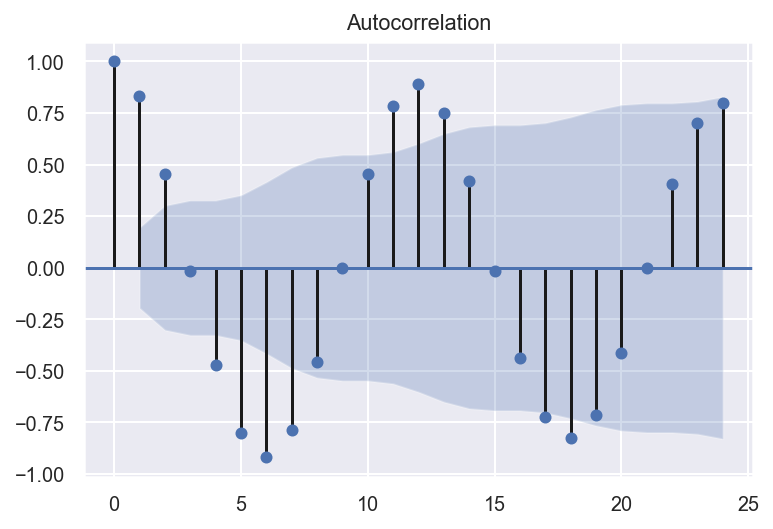

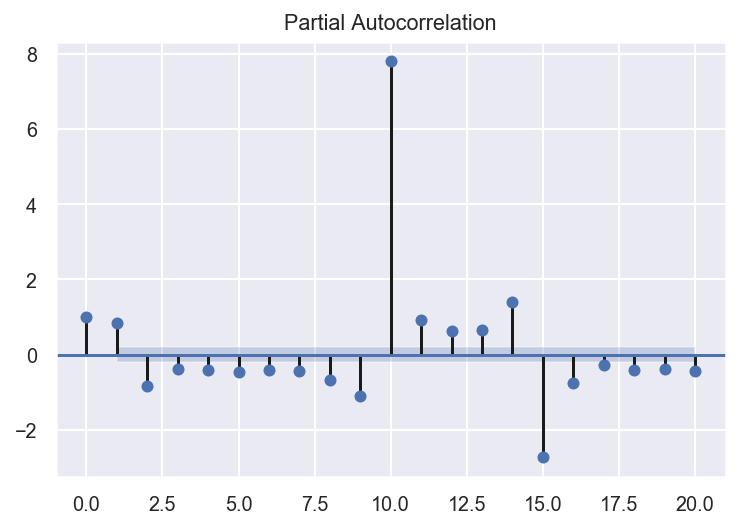

In [33]:
# We see a significant level of correlation at lag 12 in the resampled monthly data, therefore we will assume a k of 365 for both AR and MA and plot aic & bic in nearby ranges to adjust to the optimum p and q.
plot_acf(weather_df.resample('M').mean().Temperature_Avg,lags=24,alpha=0.025);
plot_pacf(weather_df.resample('M').mean().Temperature_Avg,lags=20,alpha=0.025);

In [34]:
import numpy as np

In [35]:
aic = pd.DataFrame(columns=['i-k', 'aic', 'bic'])
aic_lst = []
bic_lst = []
i_k_lst = []
for i in [14, 1, 15, 2, 12, 4]:
    for k in [1, 13, 3, 14, 4, 2, 15]:
        mod = sm.tsa.statespace.SARIMAX(weather_df.resample('M').mean()['Temperature_Avg'], order=(i,0,k), seasonal_order=(1,0,1,12), enforce_invertibility=False, enforce_stationarity=False)
        res = mod.fit()
        aic_lst.append(res.aic)
        bic_lst.append(res.bic)
        i_k_lst.append(str(i)+'-'+str(k))

C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed

In [36]:
aic['aic'] = aic_lst
aic['bic'] = bic_lst
aic['i-k'] = i_k_lst

In [37]:
aic.set_index('i-k', inplace=True)

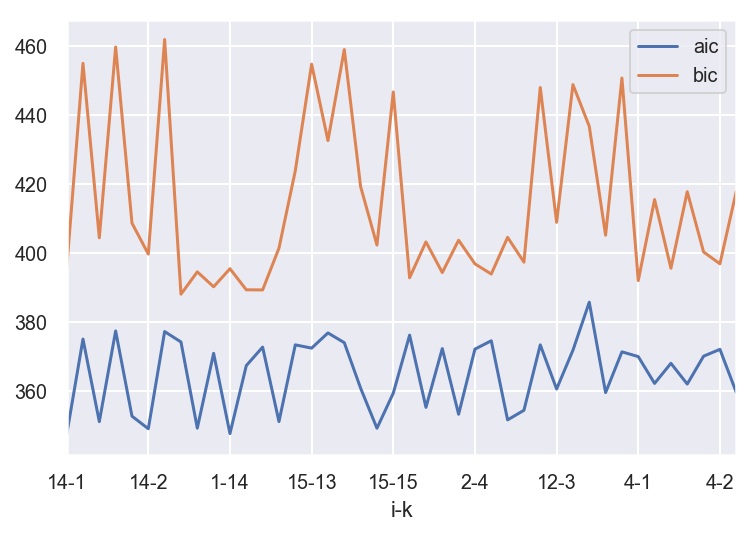

In [38]:
aic.plot();

In [39]:
aic['aic+bic'] = aic.aic+aic.bic

In [40]:
# based on these numbers we will select 1 & 13 for p&q values
aic.sort_values('aic+bic')[:5]

aic         bic     aic+bic
i-k                                     
14-1  347.293584  395.235488  742.529072
1-14  347.655323  395.426610  743.081933
1-13  349.233291  394.511755  743.745046
14-2  349.060445  399.665788  748.726233
15-2  349.197694  402.276901  751.474595

In [41]:
aic_df = pd.DataFrame()
for i in range(1,3):
    for k in range(1,3):
        mod = sm.tsa.statespace.SARIMAX(weather_df.resample('M').mean()['Temperature_Avg'], order=(1,0,13), seasonal_order=(i,0,k,12), enforce_invertibility=False, enforce_stationarity=False)
        res = mod.fit()
        aic_lst.append(res.aic)
        bic_lst.append(res.bic)
        i_k_lst.append(str(i)+'-'+str(k))

C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [42]:
aic_df['aic'] = aic_lst
aic_df['bic'] = bic_lst
aic_df['i-k'] = i_k_lst

In [43]:
aic_df.set_index('i-k', inplace=True)

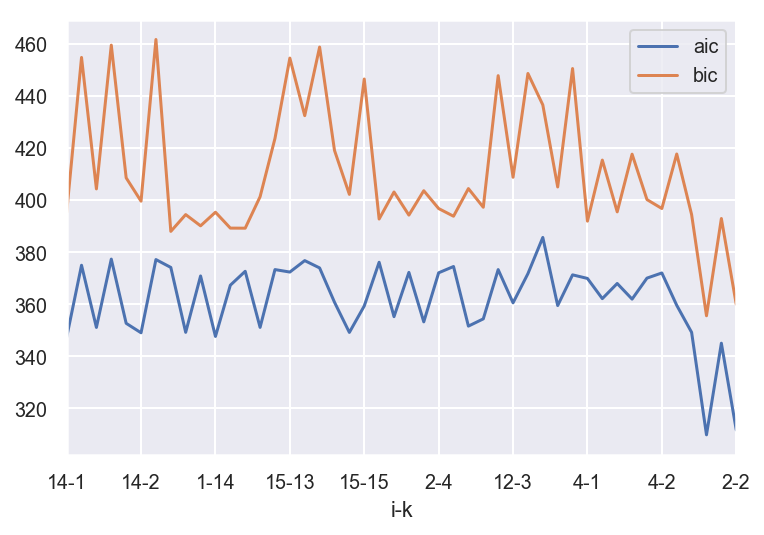

In [44]:
aic_df.plot();

In [45]:
aic_df['aic+bic'] = aic_df.aic + aic_df.bic

In [46]:
# the optimum seasonal order P & Q values are 1 & 2
aic_df.sort_values('aic+bic')[:5]

aic         bic     aic+bic
i-k                                     
1-2   309.823687  355.602993  665.426680
2-2   311.692038  360.014639  671.706677
2-1   345.062399  393.004303  738.066703
14-1  347.293584  395.235488  742.529072
1-14  347.655323  395.426610  743.081933

In [47]:
# final model
model = sm.tsa.statespace.SARIMAX(weather_df.resample('M').mean()['Temperature_Avg'], order=(1,0,13), seasonal_order=(1,0,2,12), enforce_invertibility=False, enforce_stationarity=False)
model = model.fit()
model.summary()

C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:                     Temperature_Avg   No. Observations:                  132
Model:             SARIMAX(1, 0, 13)x(1, 0, 2, 12)   Log Likelihood                -136.912
Date:                             Sun, 05 May 2019   AIC                            309.824
Time:                                     10:01:22   BIC                            355.603
Sample:                                 01-31-2008   HQIC                           328.315
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4382      0.261      1.677      0.094      -0.074       0.950
ma.L1         -0.2243      1.396     -0.161      0.872      -2.960       2.511
ma.L2         -0.4028      1.134     -0.355      0.722      -2.625       1.819
ma.L3          0.0099      0.456      0.022      0.983      -0.883       0.903
ma.L4          0.1951      0.480      0.407      0.684      -0.746       1.136
ma.L5         -0.3230      0.693     -0.466      0.641      -1.682       1.036
ma.L6          0.0607      0.447      0.136      0.892      -0.815       0.936
ma.L7         -0.1925      0.561     -0.343      0.731      -1.292       0.907
ma.L8          0.1371      0.555      0.247      0.805      -0.952       1.226
ma.L9         -0.2146      0.578     -0.371      0.711      -1.348       0.919
ma.L10         0.2402      0.390      0.615      0.538      -0.525       1.005
ma.L11        -0.2283      0.344     -0.665      0.506      -0.902       0.445
ma.L12        -0.0505      0.217     -0.233      0.816      -0.476       0.375
ma.L13        -0.0358      0.184     -0.195      0.846      -0.396       0.325
ar.S.L12       1.0037      0.001   1059.179      0.000       1.002       1.006
ma.S.L12      -0.9248      0.265     -3.491      0.000      -1.444      -0.406
ma.S.L24       0.0737      0.227      0.325      0.745      -0.371       0.518
sigma2         0.8457      1.148      0.736      0.461      -1.405       3.097
===================================================================================
Ljung-Box (Q):                       21.72   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.99   Prob(JB):                         0.65
Heteroskedasticity (H):               1.12   Skew:                            -0.17
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


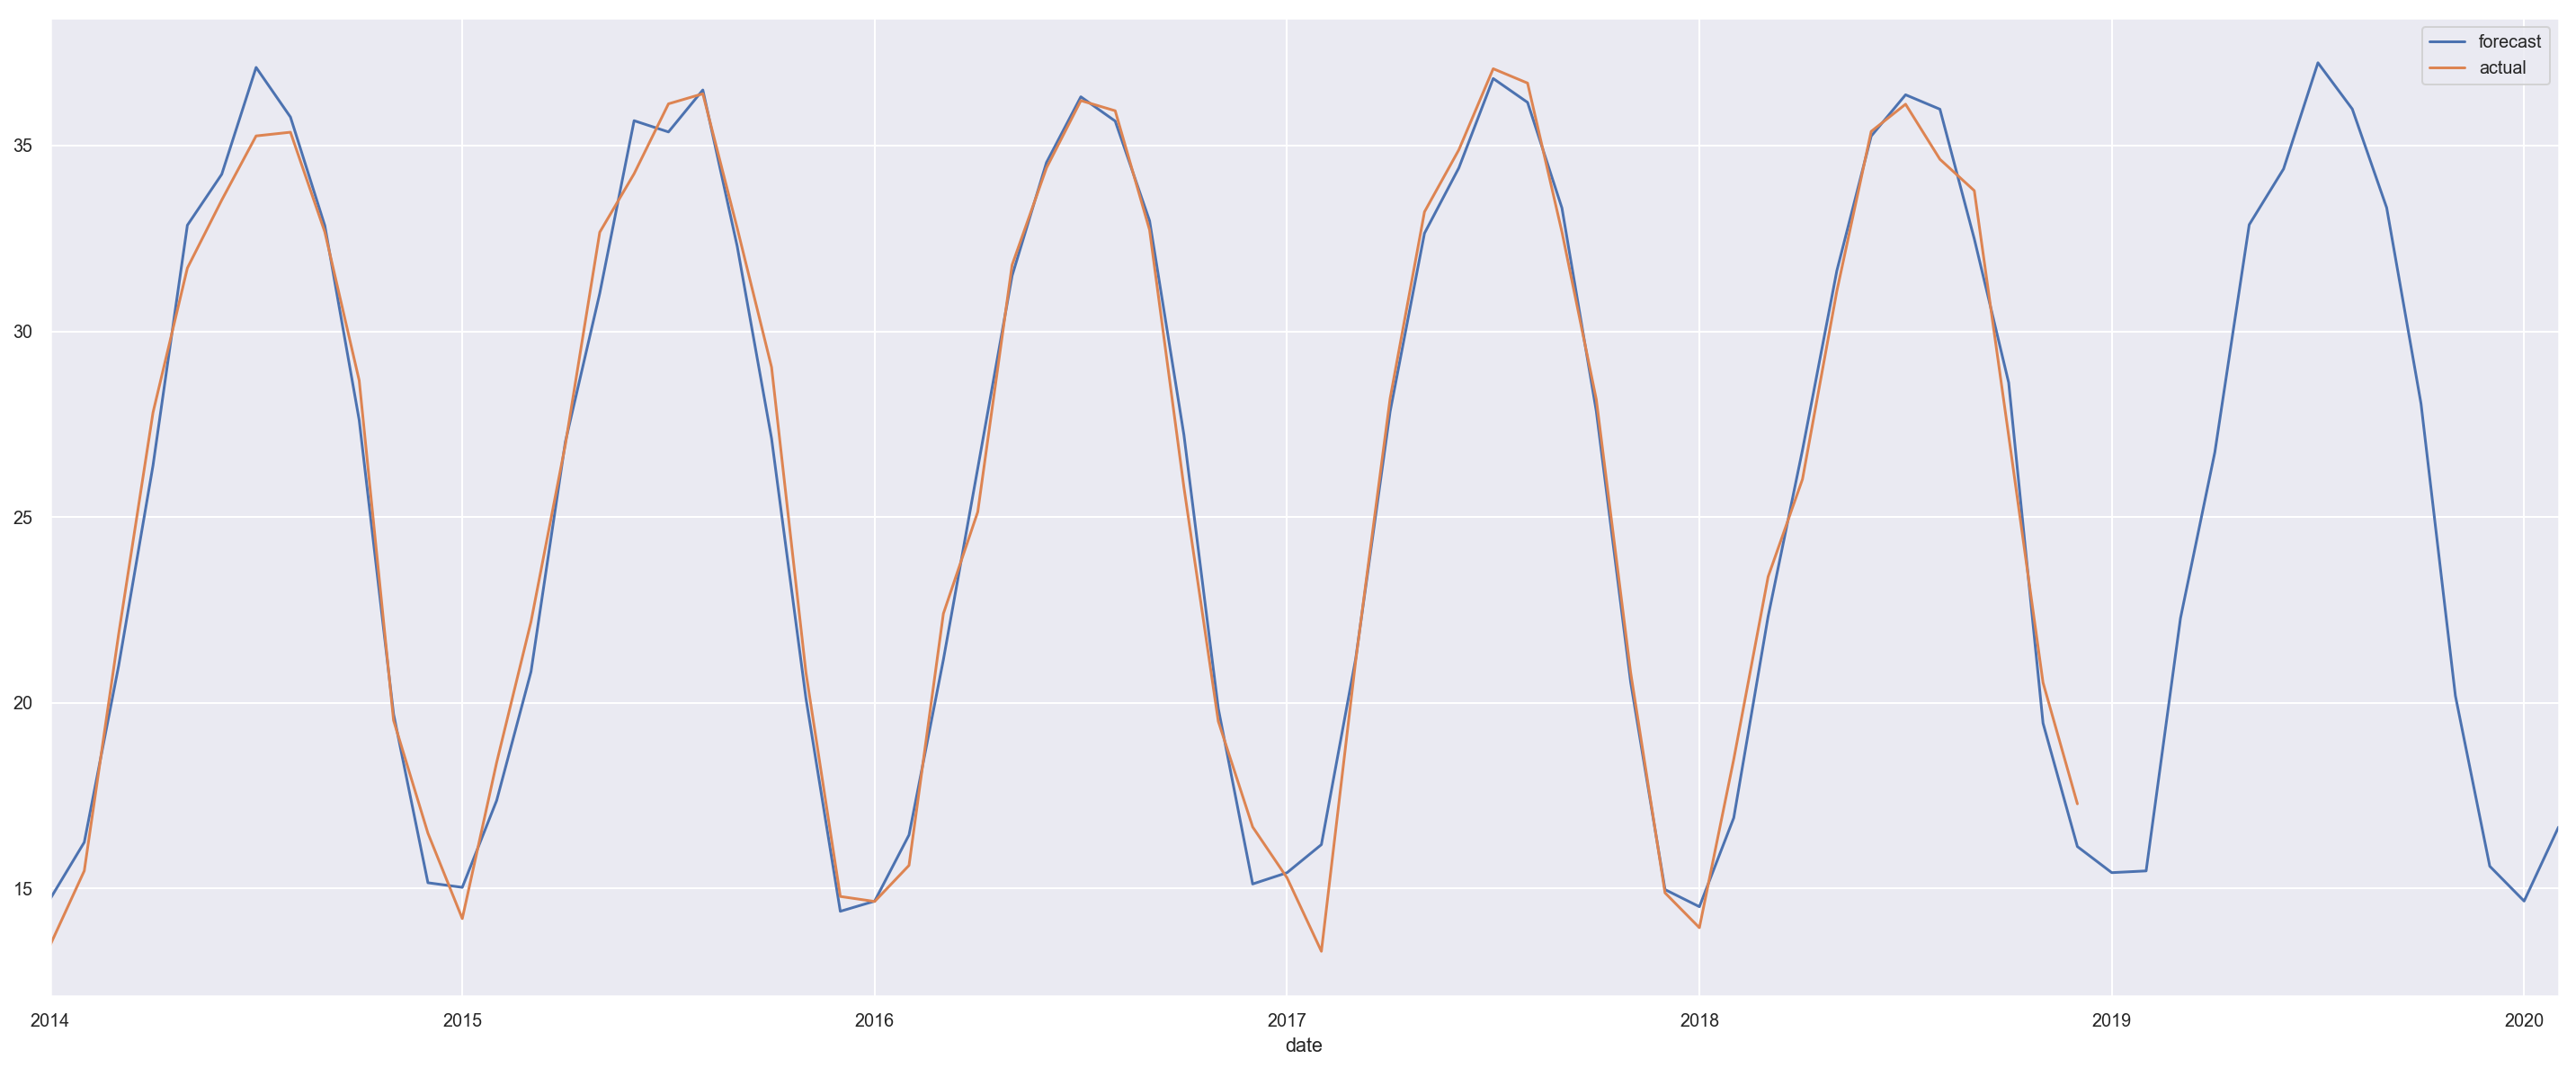

In [48]:
# use model to plot forecast 2019 temps
prediction = model.predict(72, 145)
actual = weather_df.resample("M").mean().Temperature_Avg[72:]
plt.figure(figsize=(25,10))
prediction.plot(label='forecast')
actual.plot(label='actual')
plt.legend();

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weather_df.Temperature_Avg.resample('M').mean())

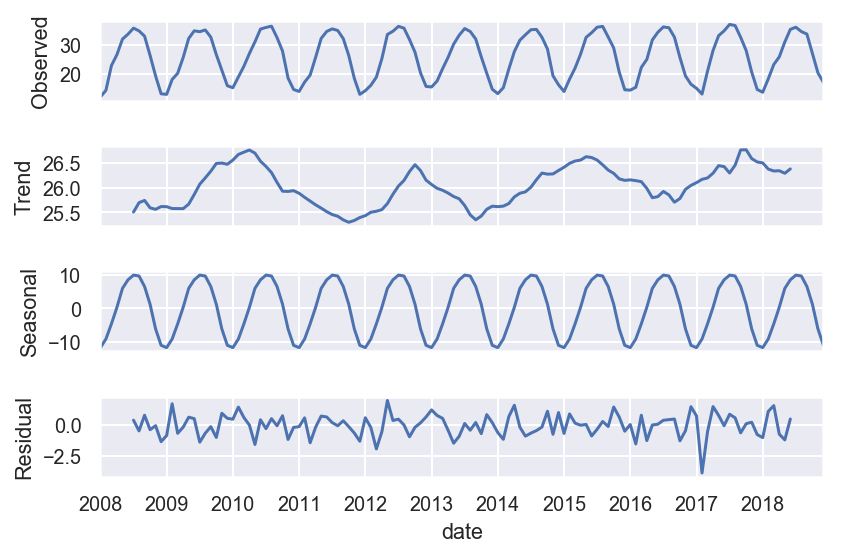

In [50]:
result.plot()
plt.show();

In [51]:
temp_trend = result.trend.dropna()

In [52]:
# lets check if the avg temp trend is stationary using adfuller, since p-value > 5% we cant reject the hypothesis that it is non-stationary
adfuller(temp_trend)[1]

0.22557513140520524

In [53]:
# we now check adfuller on diff(1) to see if setting i in our ARIMA model will satisfy stationarity, result shows that it does
adfuller(temp_trend.diff().dropna())[1]

1.2172475133348945e-05

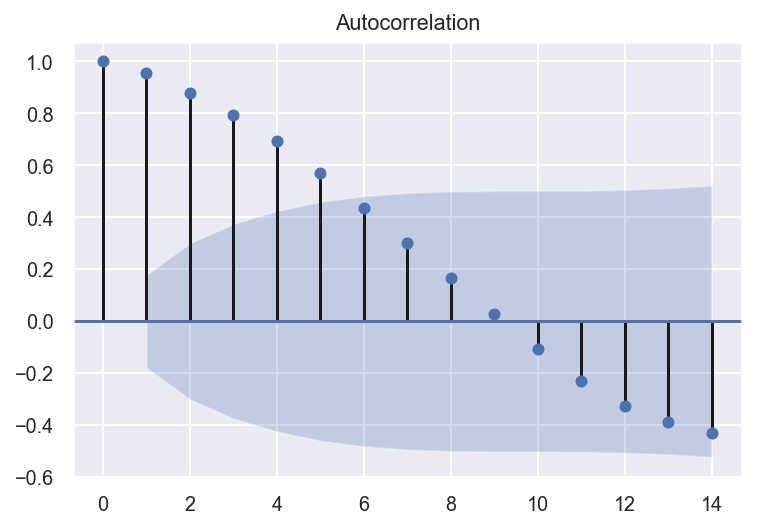

In [54]:
# lets check acf and pacf for trend
plot_acf(temp_trend, lags=14);

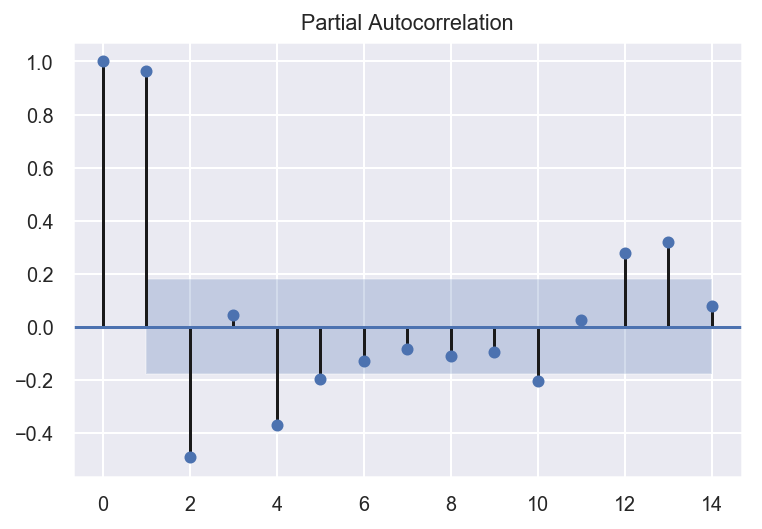

In [55]:
plot_pacf(temp_trend, lags=14);

In [56]:
# lets do an ARIMA model for the temp trend, setting the p using pacf and q using the acf above
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(temp_trend, (2, 1, 5))
result = model.fit()

C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


C:\Users\TQ\Anaconda3\envs\keras\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


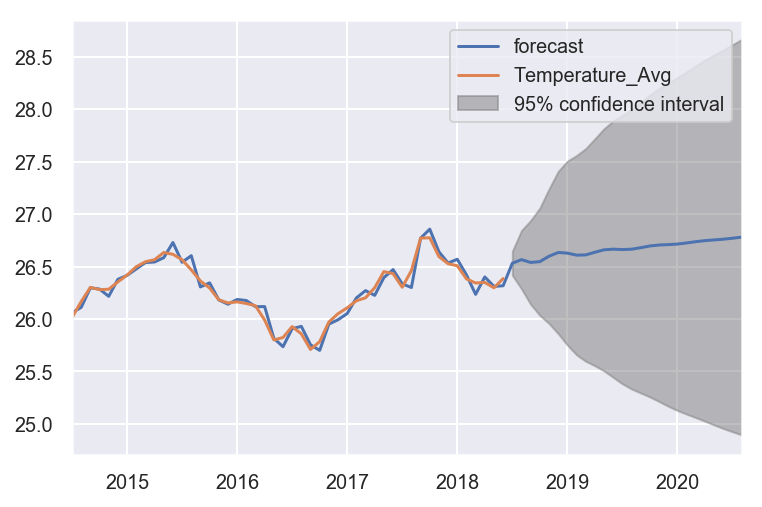

In [57]:
result.plot_predict(72, 145)
plt.show();

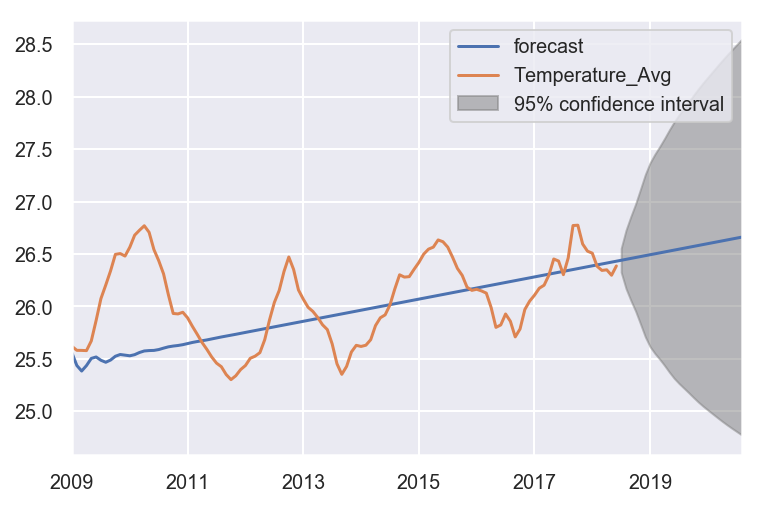

In [58]:
# lets set dynamic to true and see if there is a general increase in avg temps over the past decade.
# We notice a very slight general increase which may be attributed to global warming
result.plot_predict(6, 145, dynamic=True)
plt.show();